In [46]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

In [47]:
def classify_loud_segments_vectorized(y, sr, frame_duration, hop_length, rms_threshold, zcr_threshold):
    frame_length = int(frame_duration * sr)
    hop_length = int(hop_length * sr)
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)
    labels = (rms >= rms_threshold) & (zcr >= zcr_threshold)
    segments = [(1 if l else 0, [t, t + frame_duration]) for l, t in zip(labels, times)]
    return segments

In [48]:
def plot_waveform_with_segments_multi(ax, audio, sr, list_result, title):
    time_axis = np.linspace(0, len(audio) / sr, len(audio))
    ax.plot(time_axis, audio, linewidth=0.5)
    for label, (start, end) in list_result:
        if label == 1:
            ax.axvspan(start, end, color='red', alpha=0.3)
    ax.set_title(title, fontsize=8)
    ax.set_xlim(0, len(audio) / sr)
    ax.set_ylim(-1, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
def plot_waveform_with_segments_single(audio, sr, list_result, title):
    time_axis = np.linspace(0, len(audio) / sr, len(audio))
    plt.figure(figsize=(12, 3))
    plt.plot(time_axis, audio, linewidth=0.5)
    for label, (start, end) in list_result:
        if label == 1:
            plt.axvspan(start, end, color='red', alpha=0.3)
    plt.title(title)
    plt.xlim(0, len(audio) / sr)
    plt.ylim(-1, 1)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

In [49]:
SAMPLE_RATE = 22050
FRAME_DURATION = 0.5
HOP_LENGTH = 0.25

In [50]:
folder_path = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"
# folder_path = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"

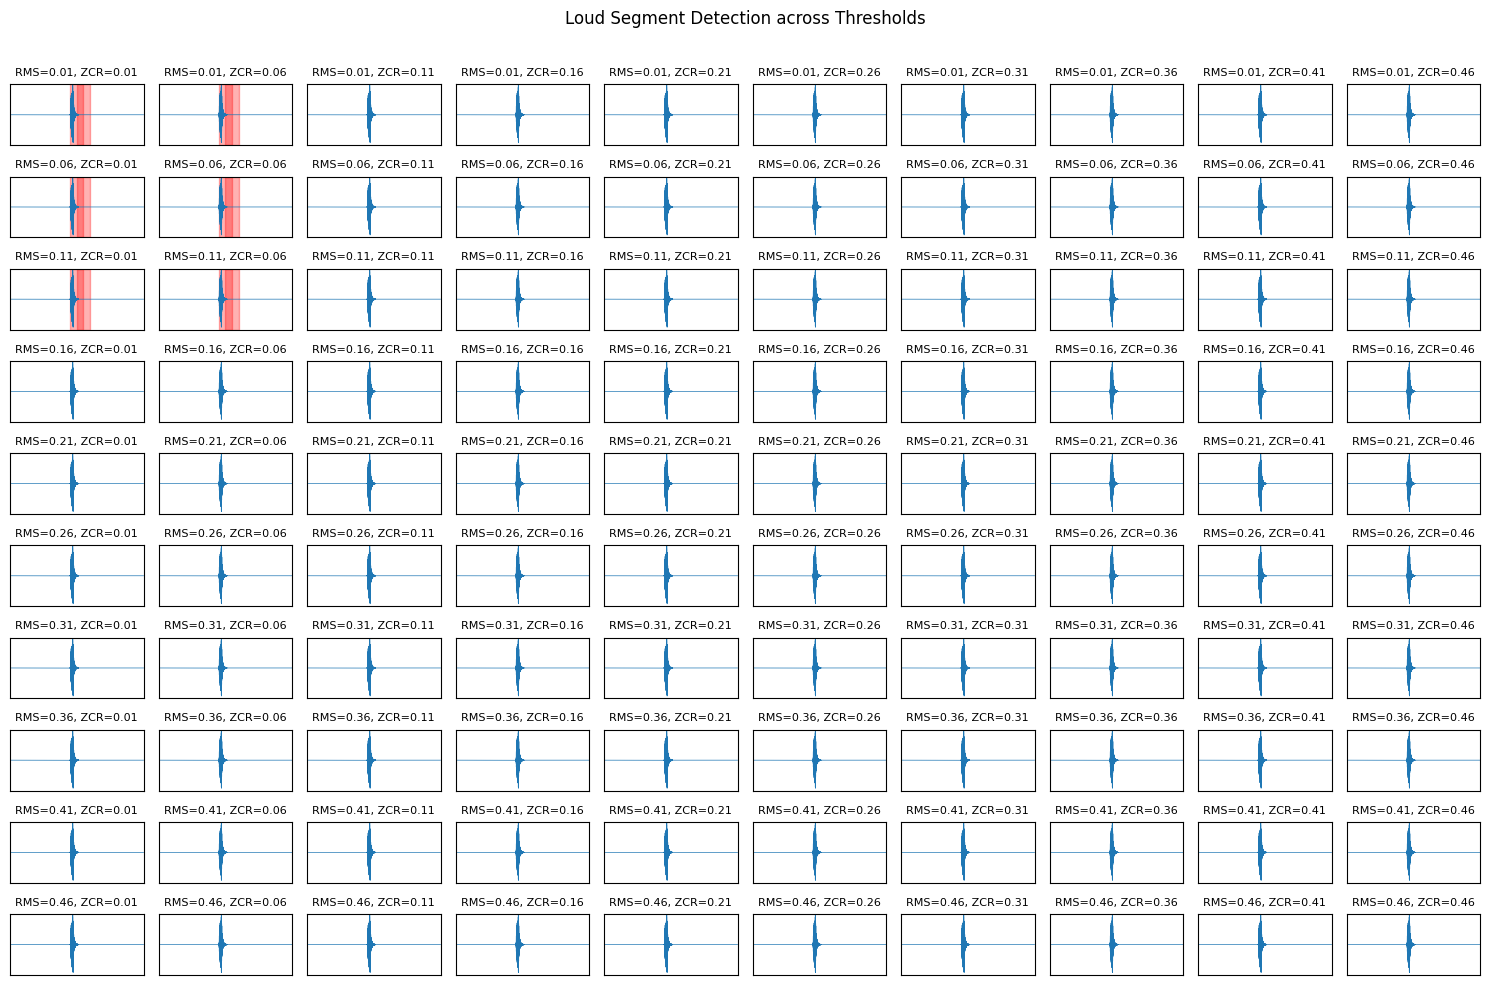

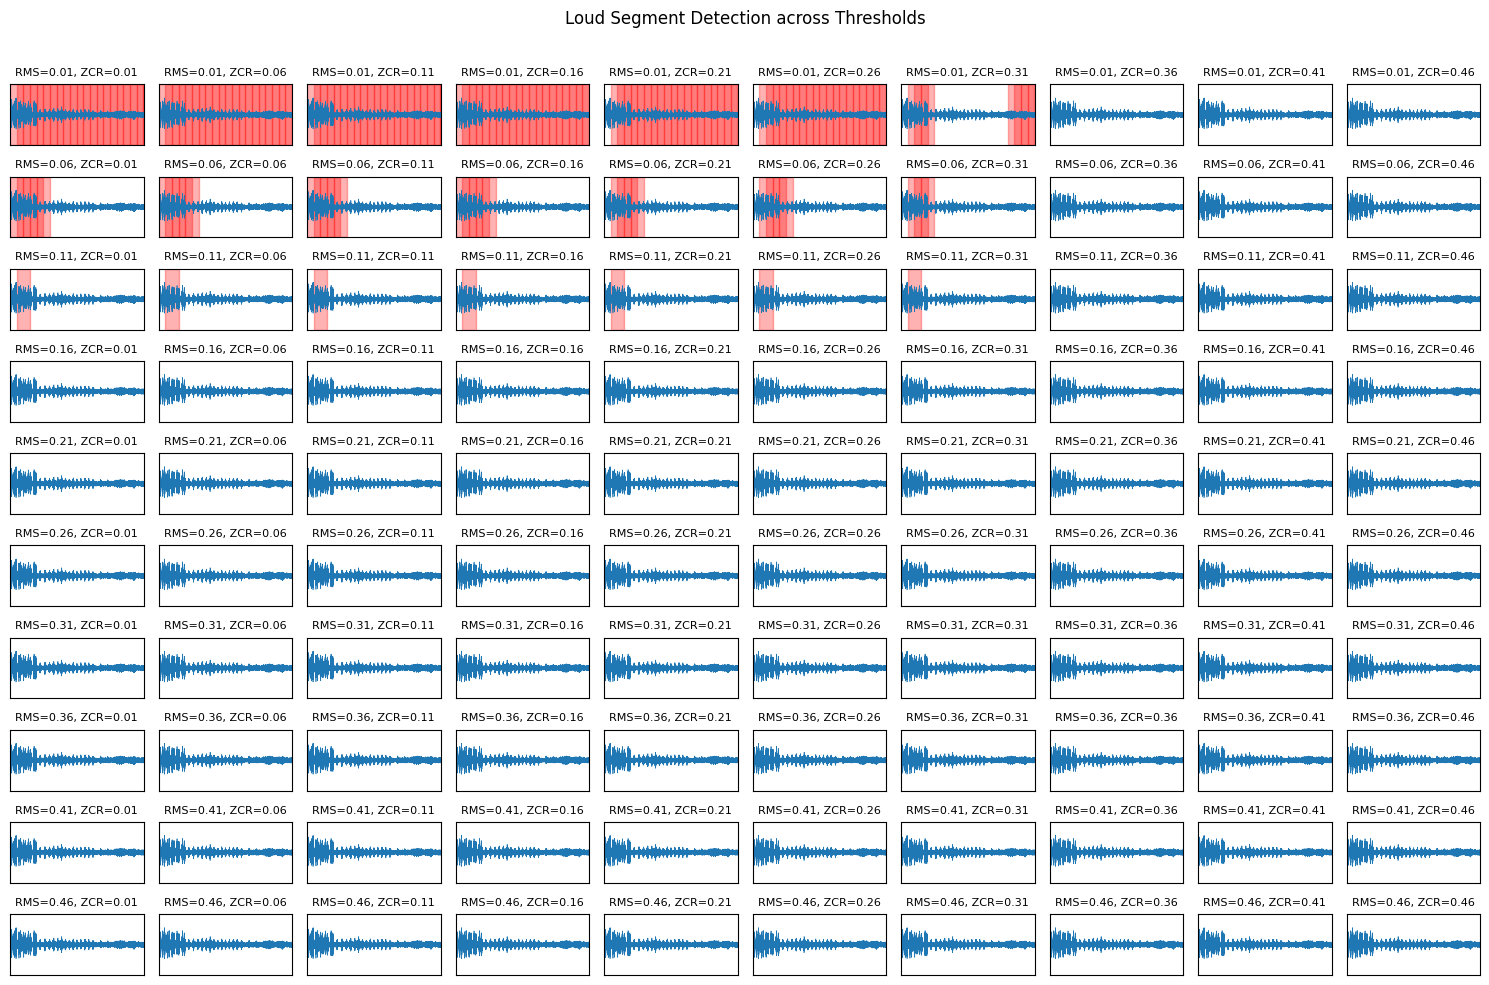

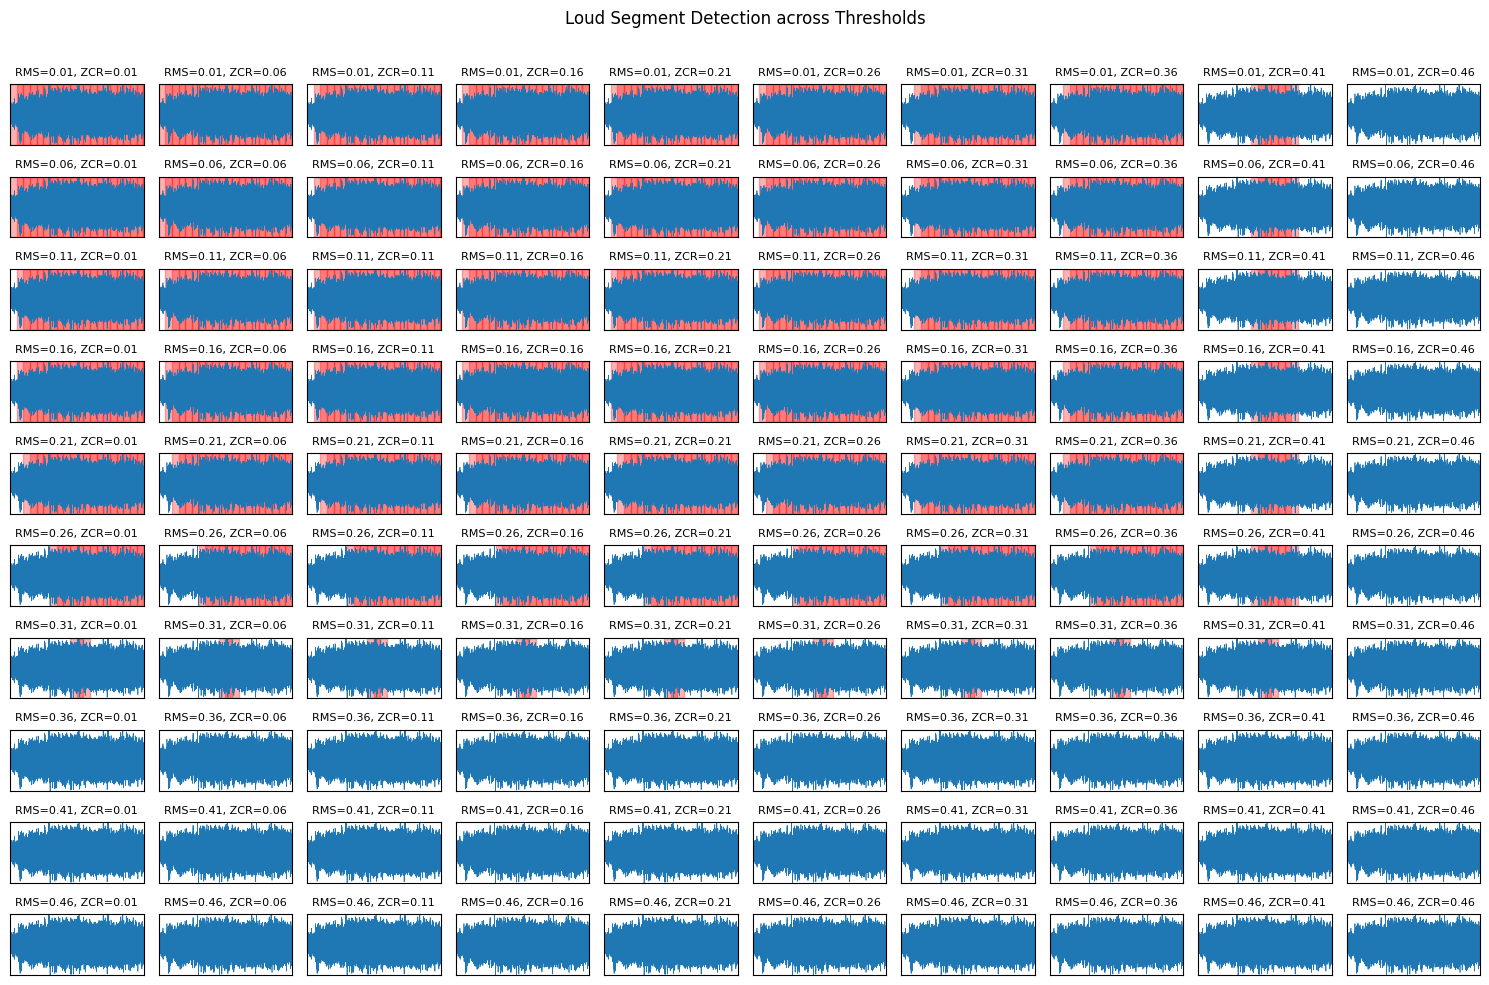

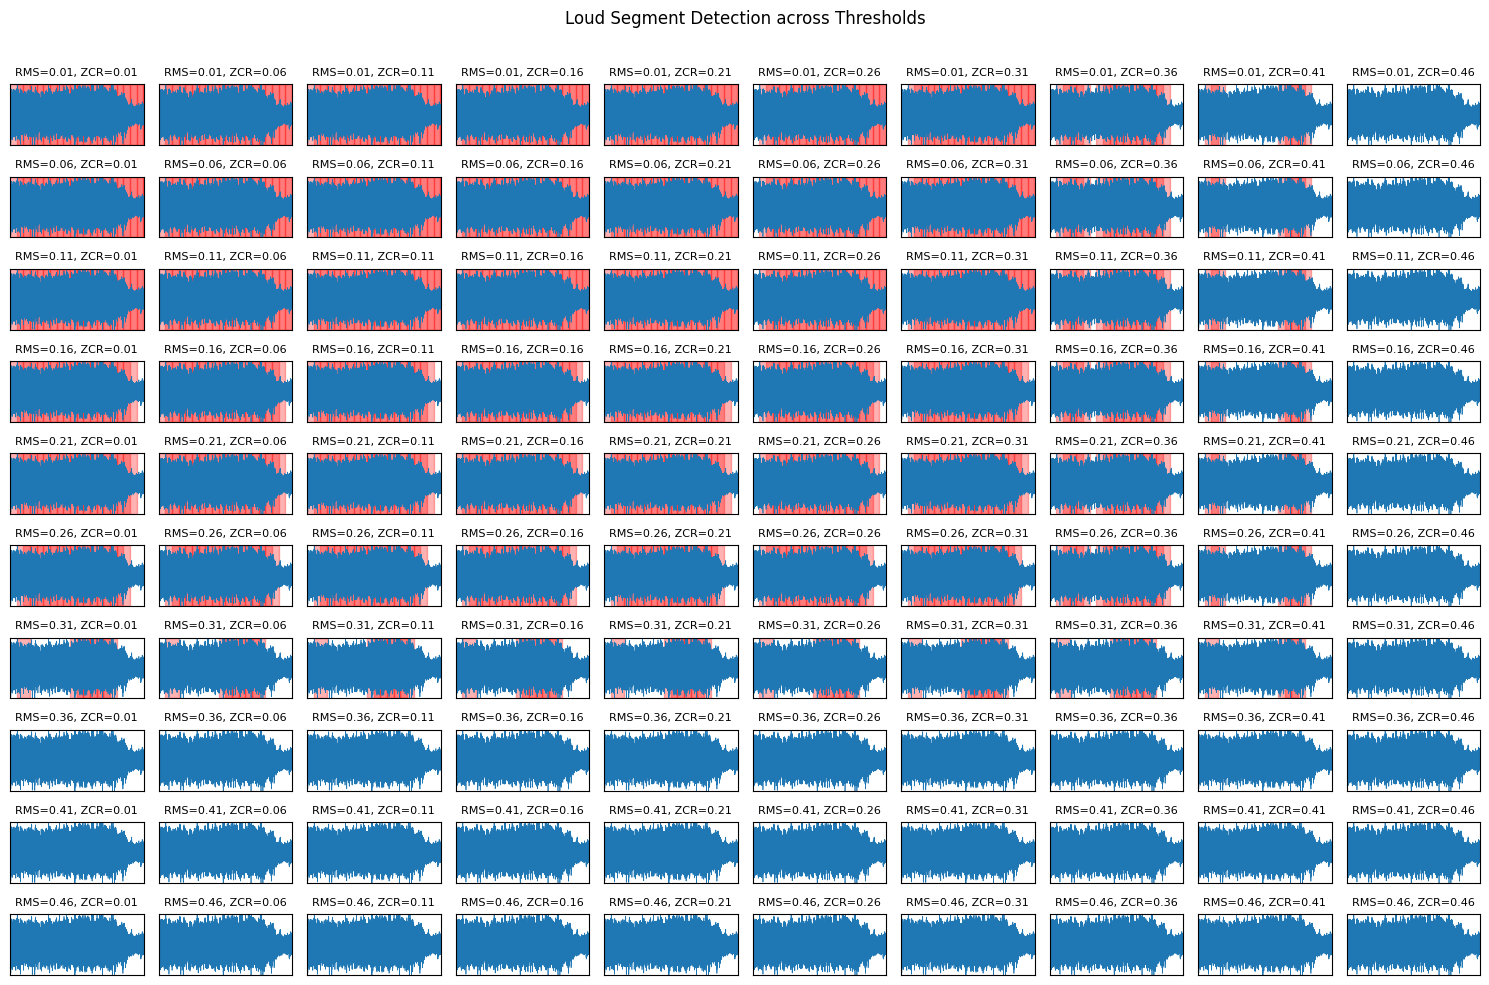

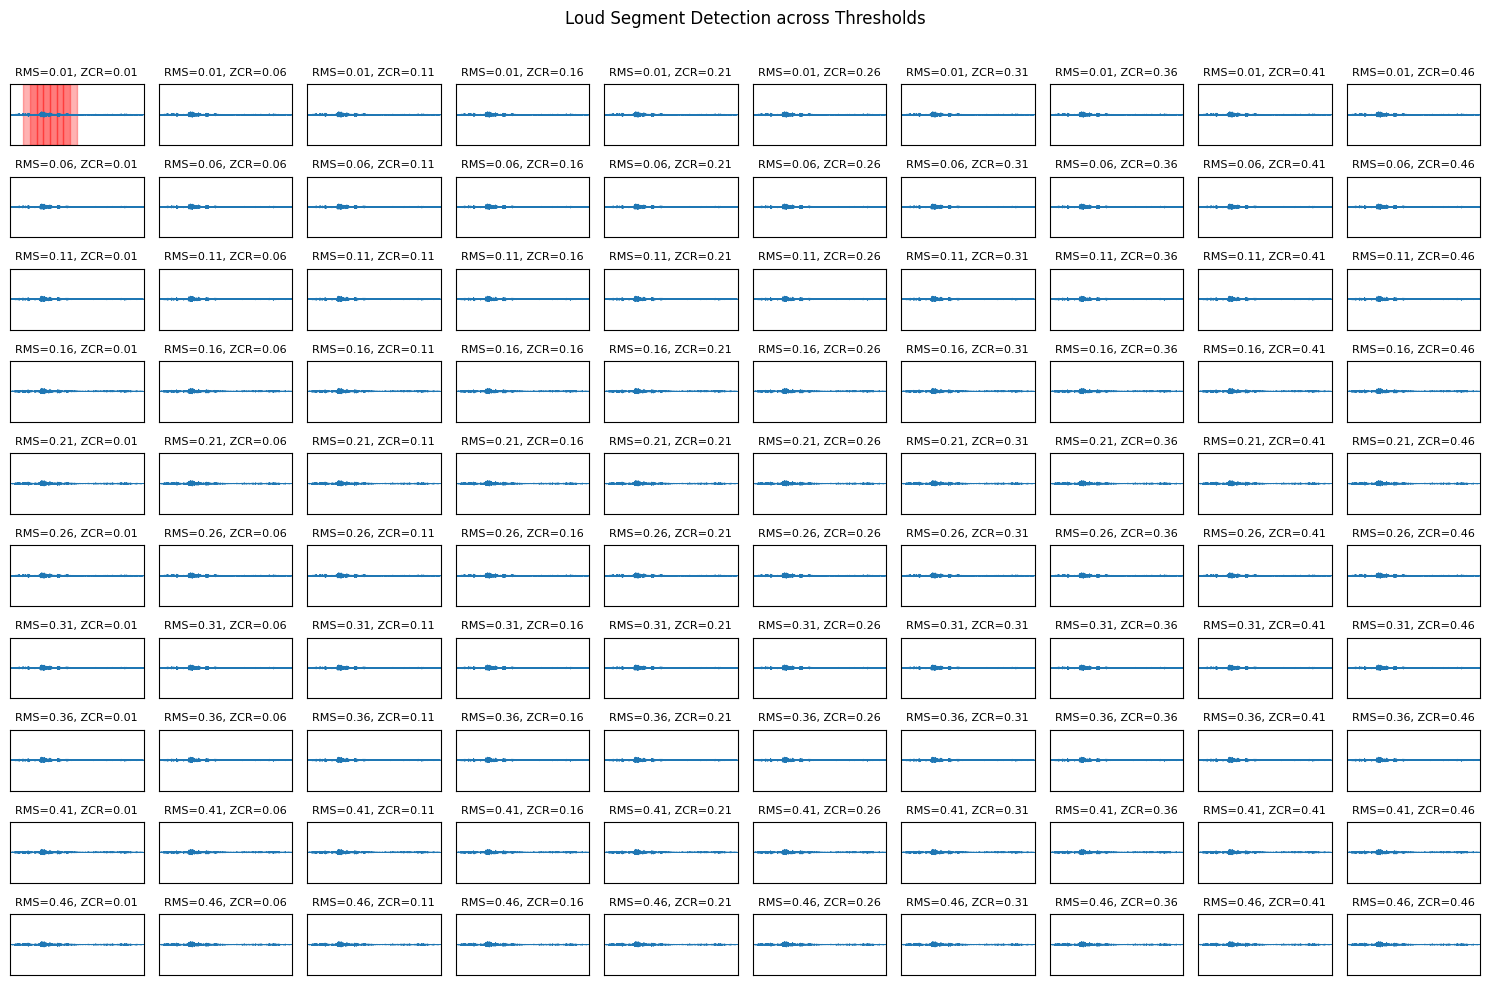

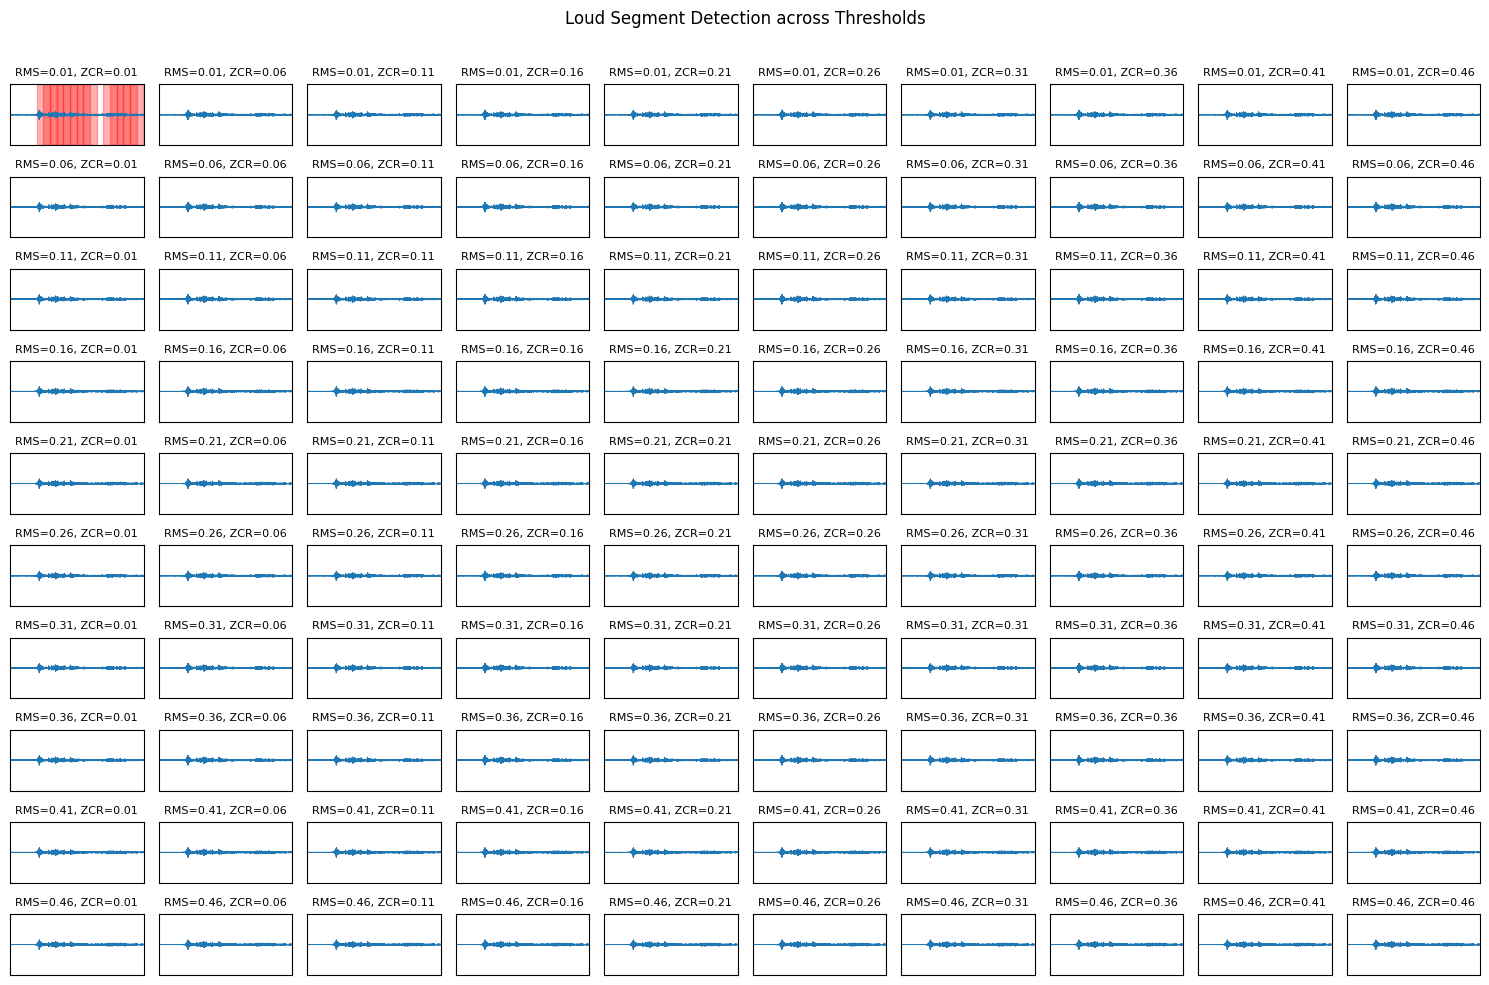

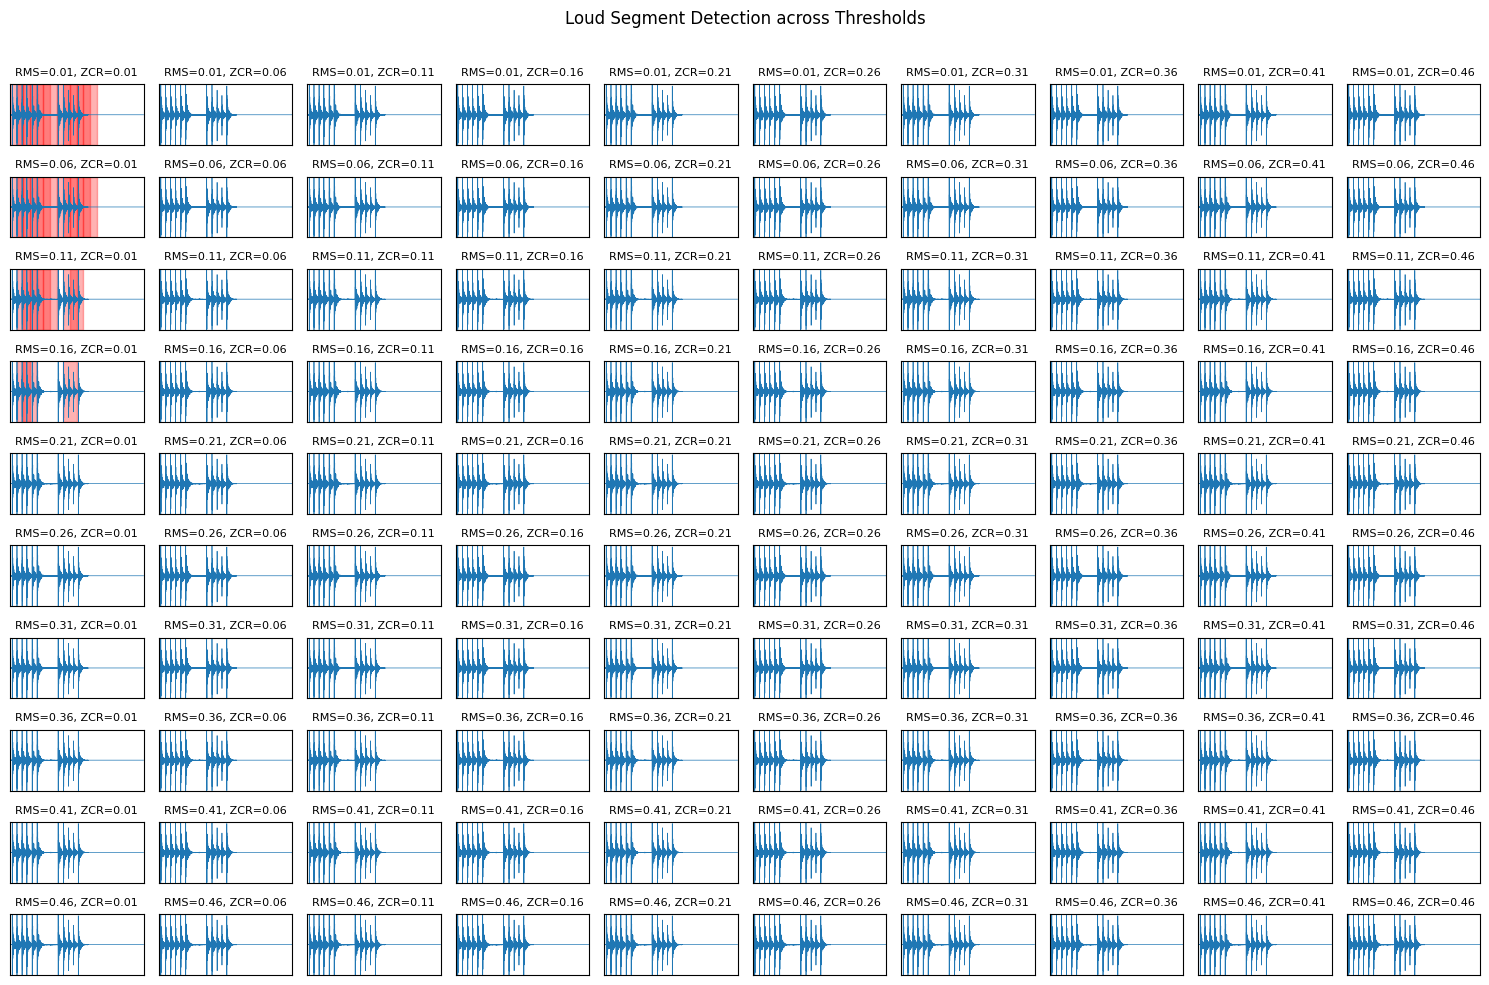

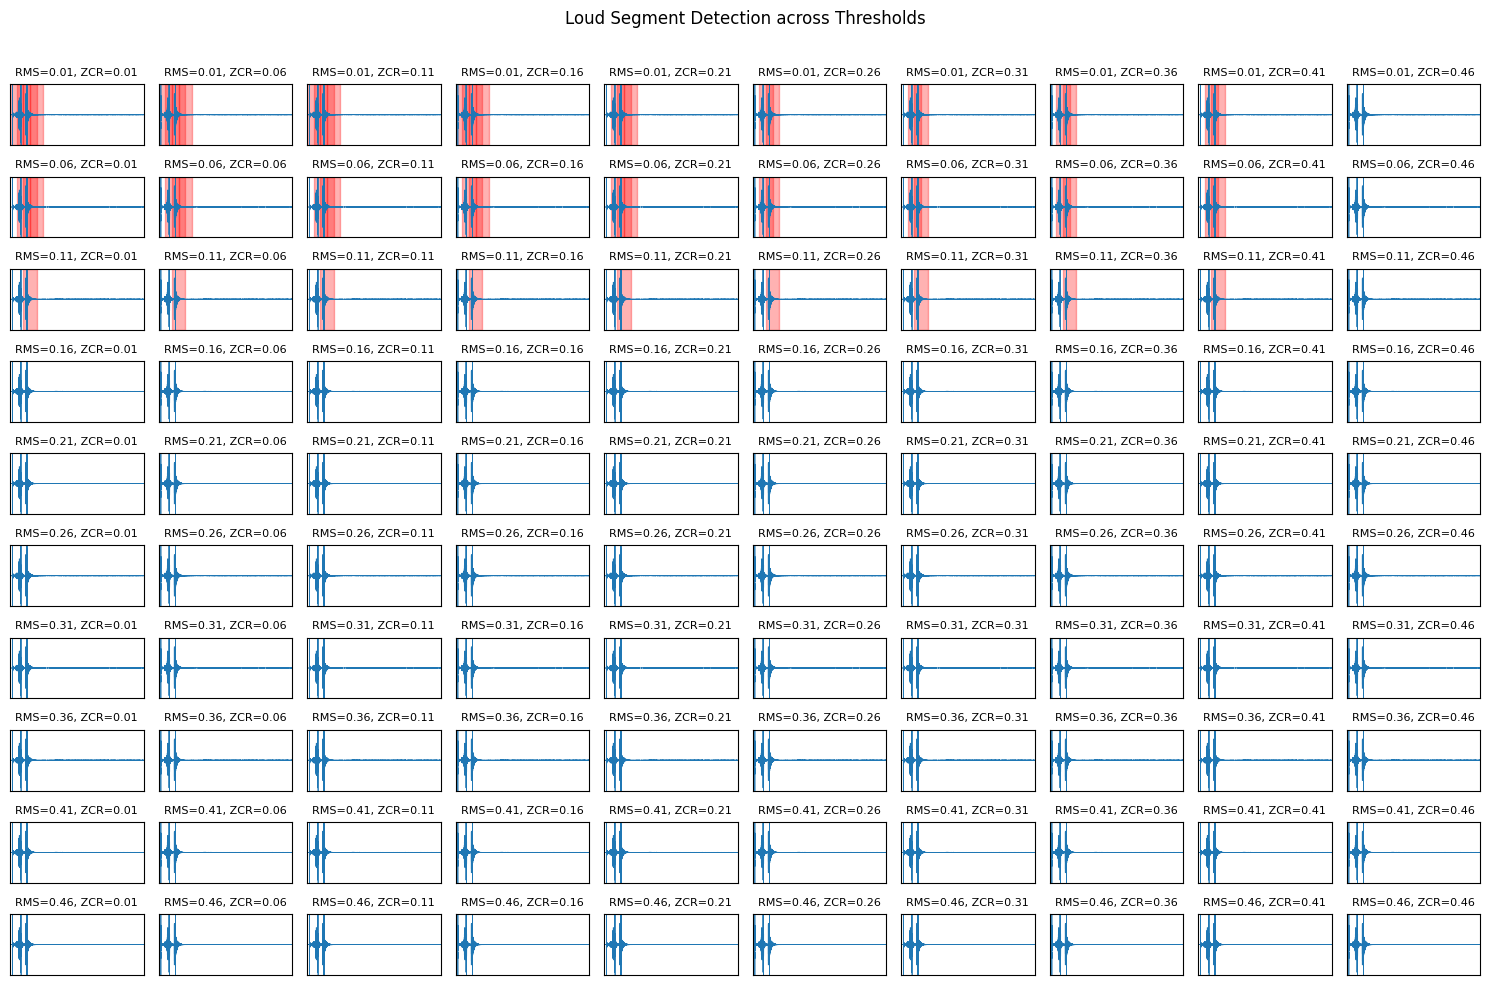

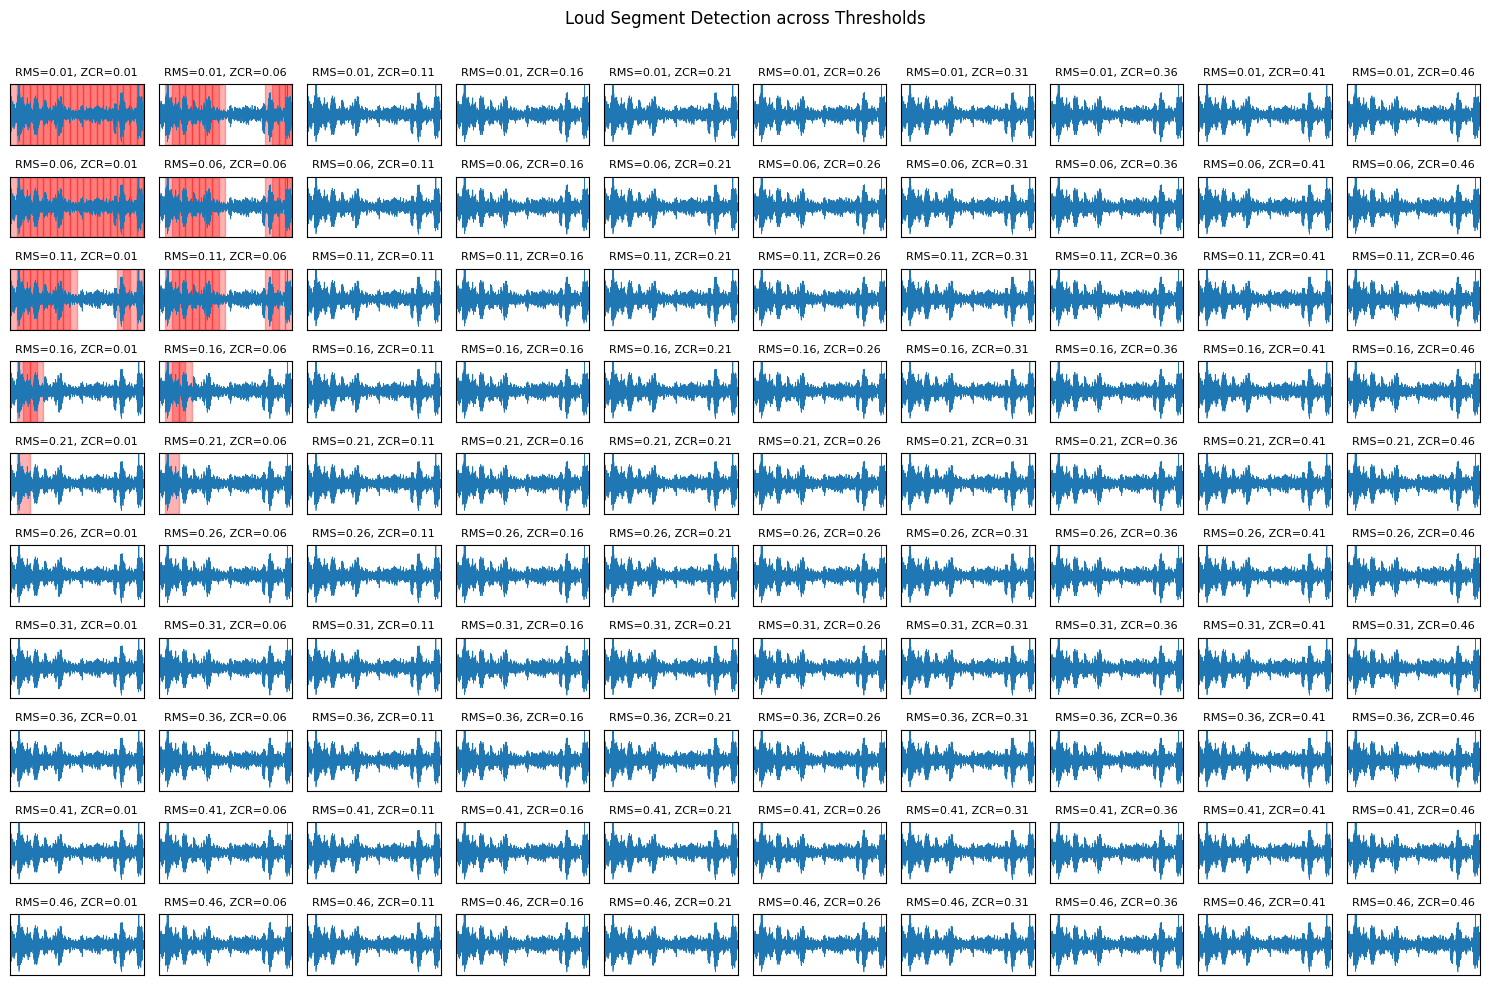

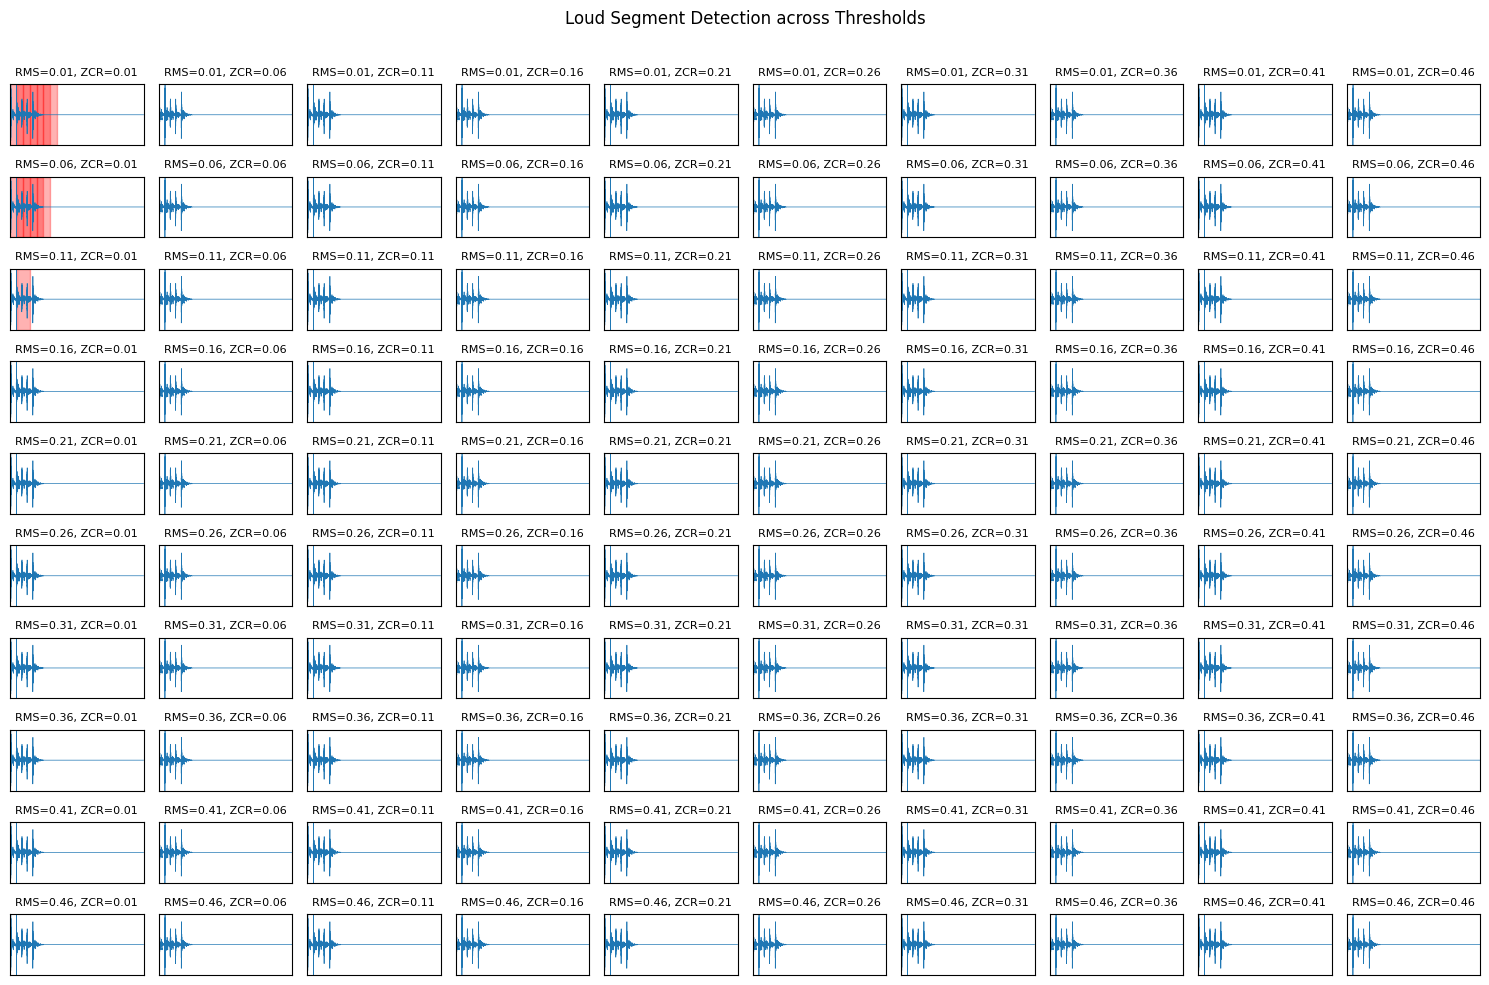

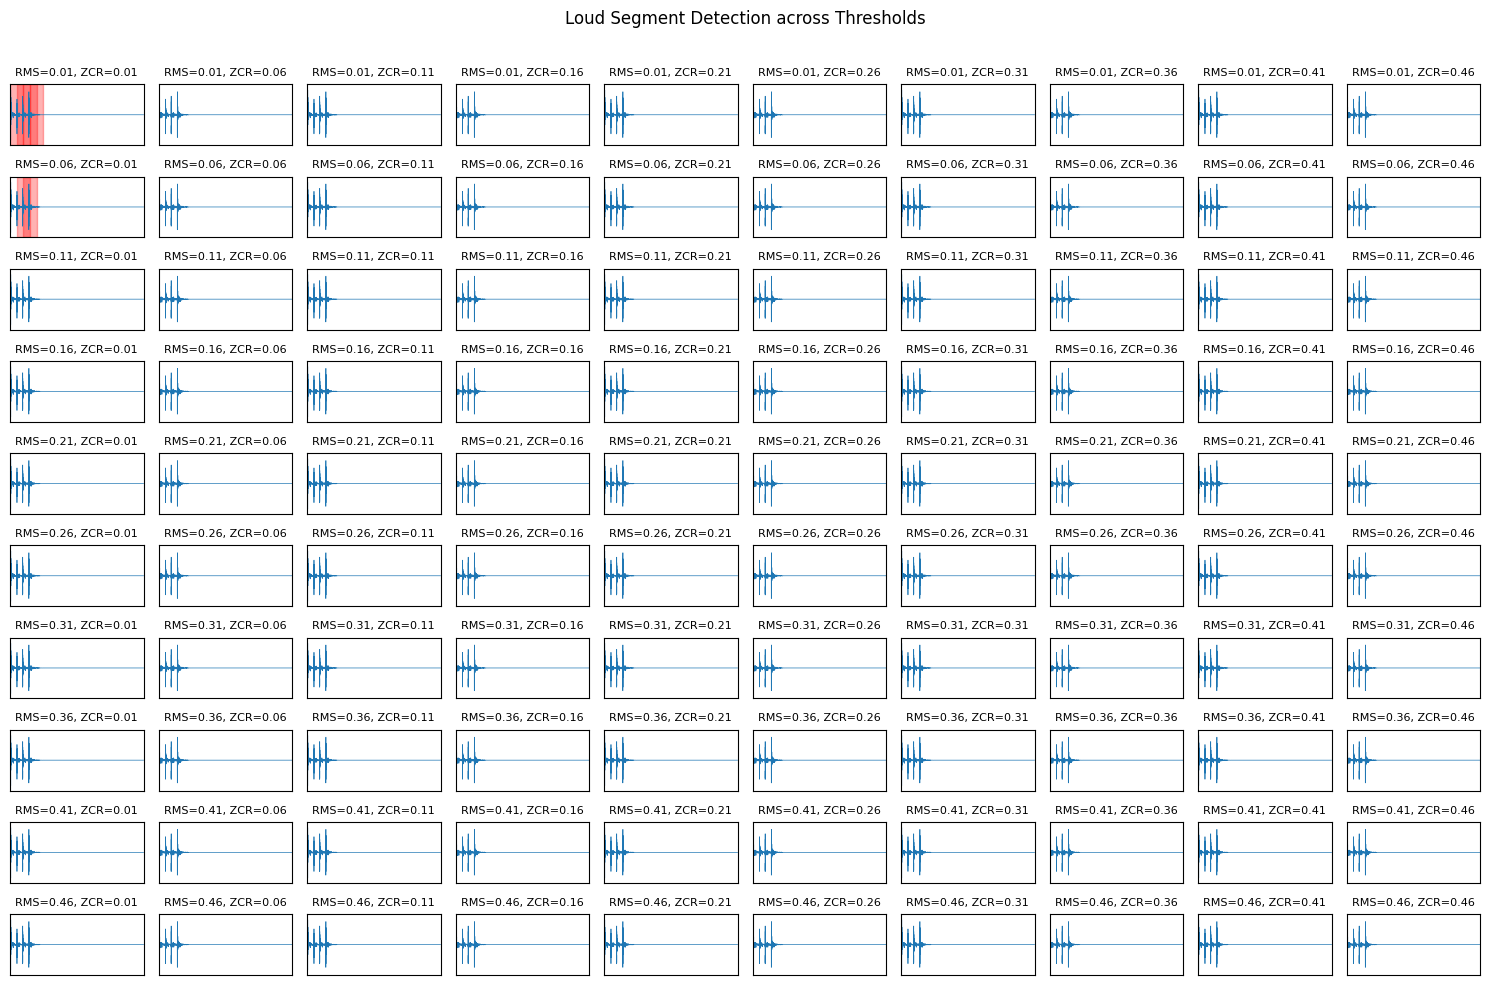

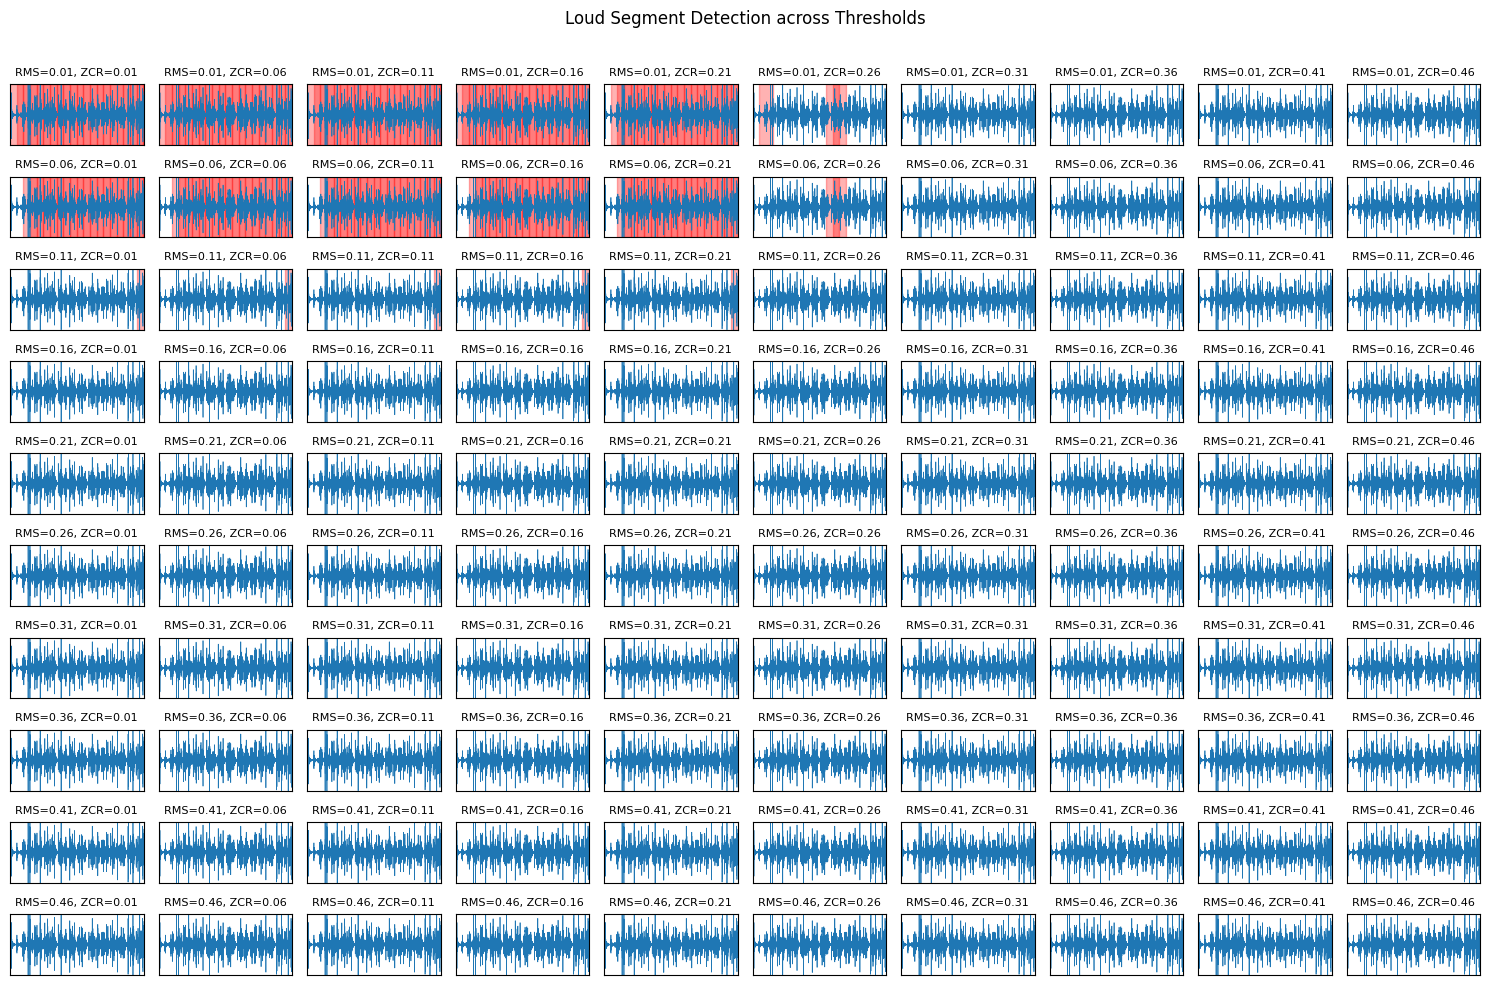

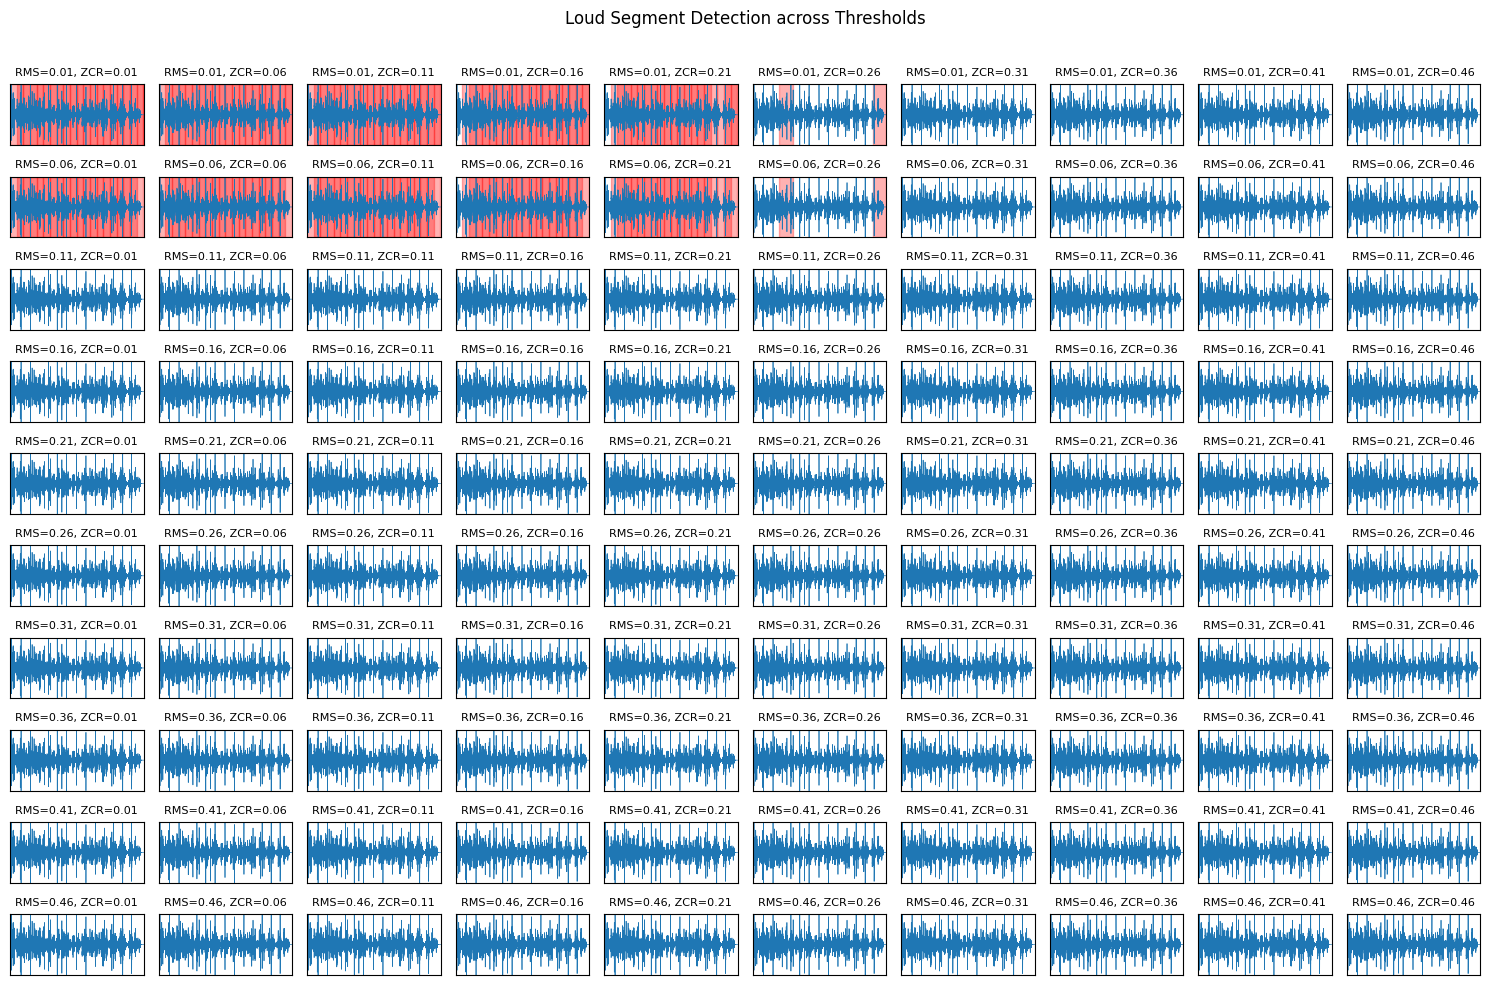

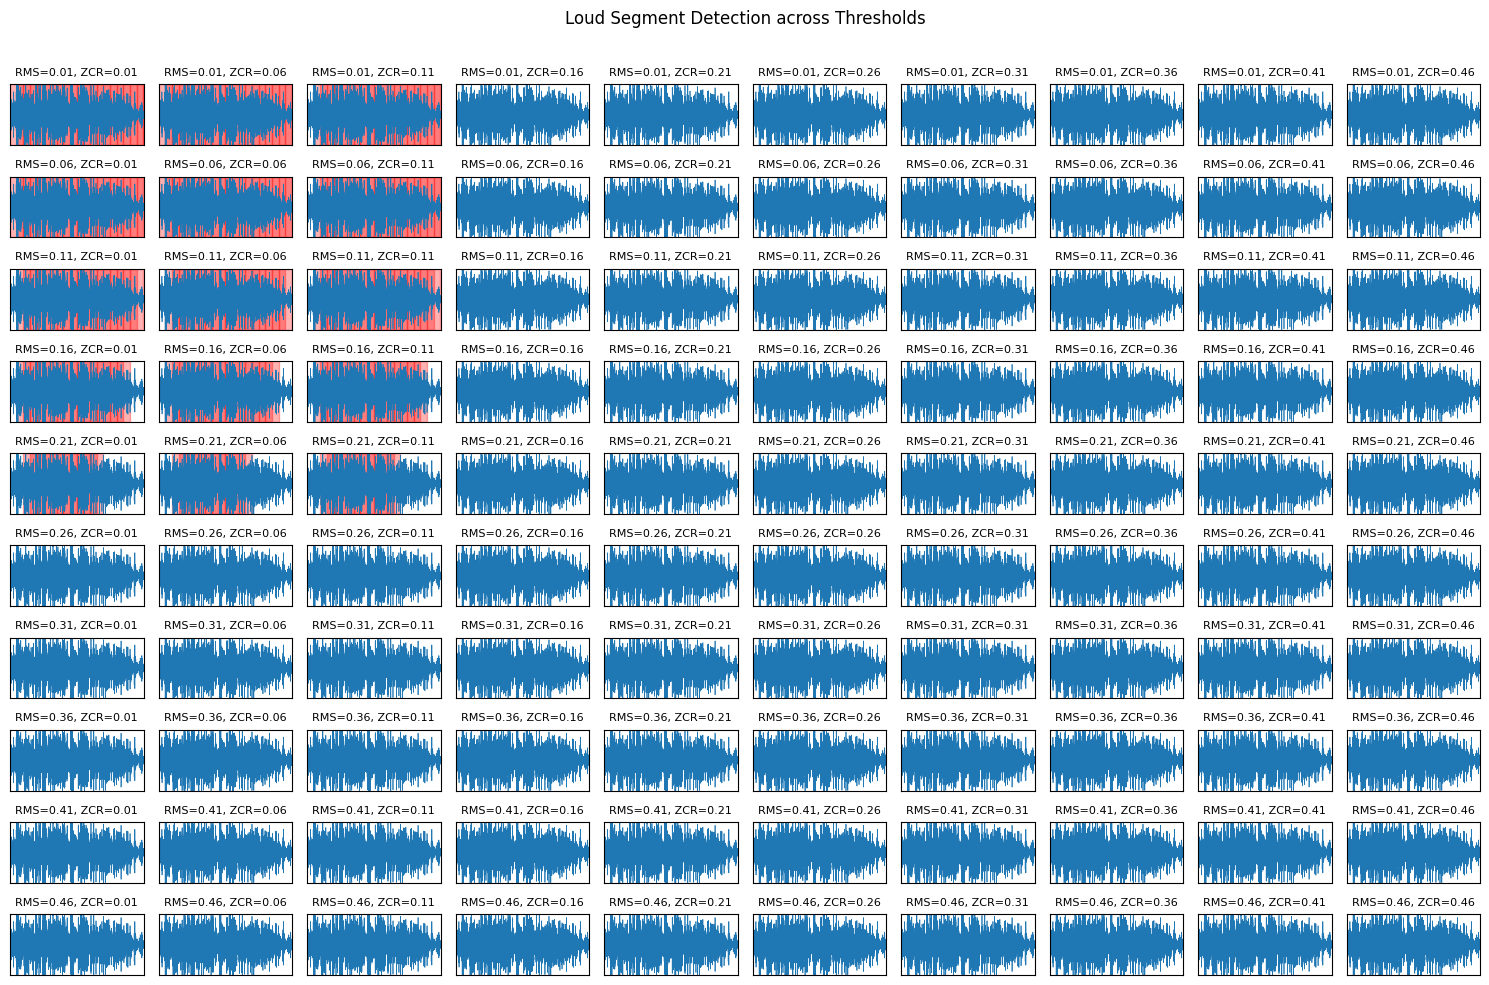

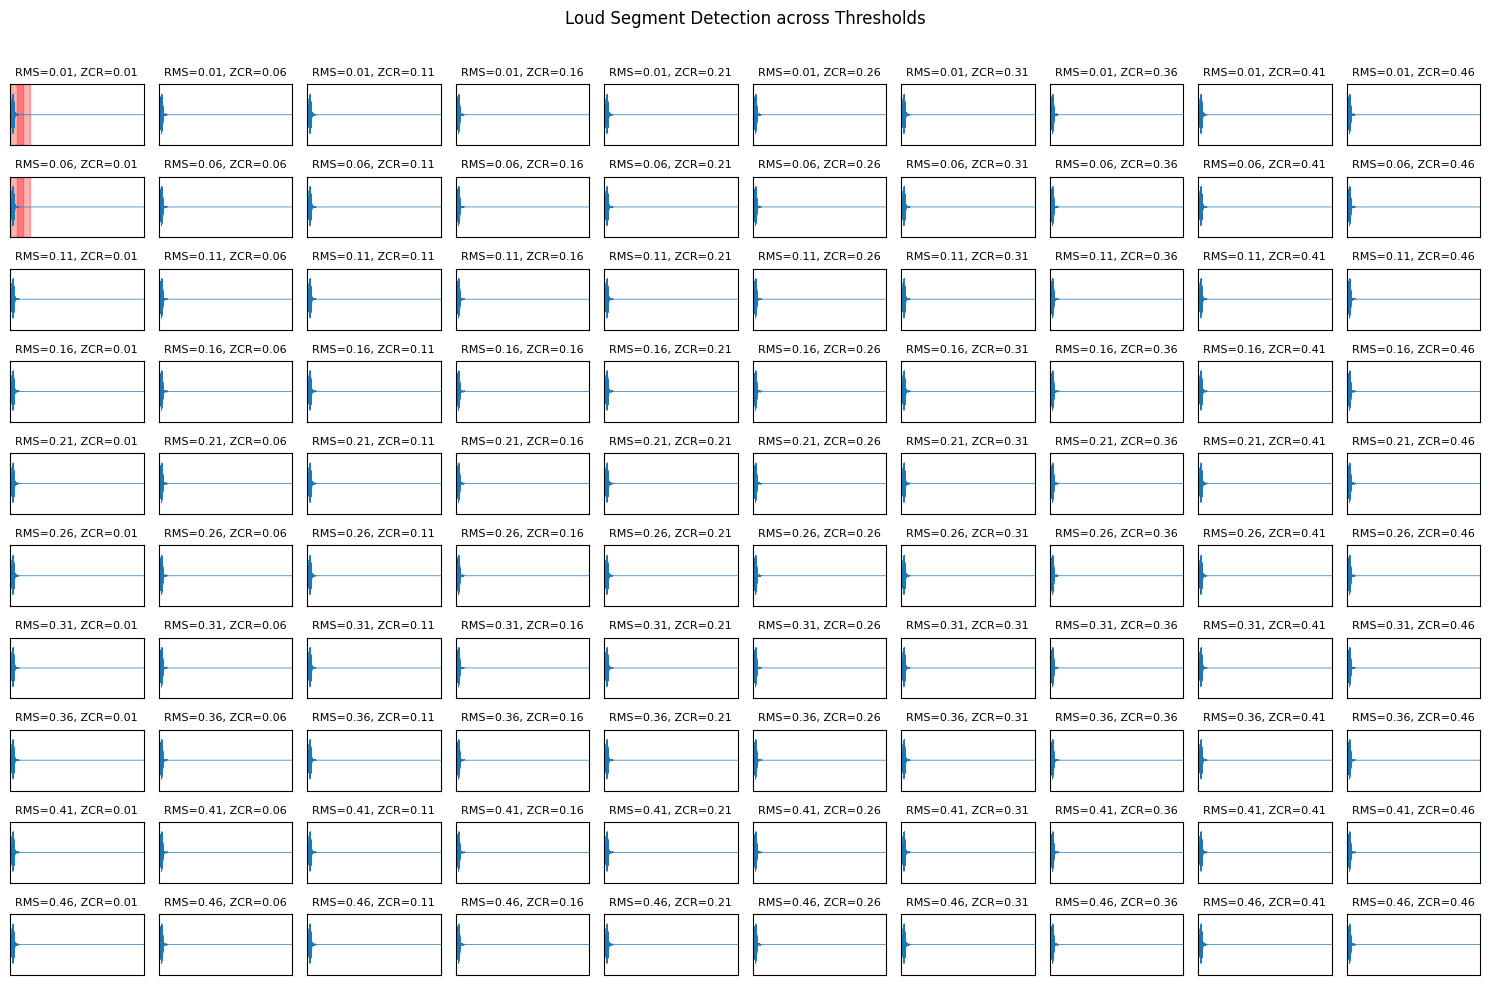

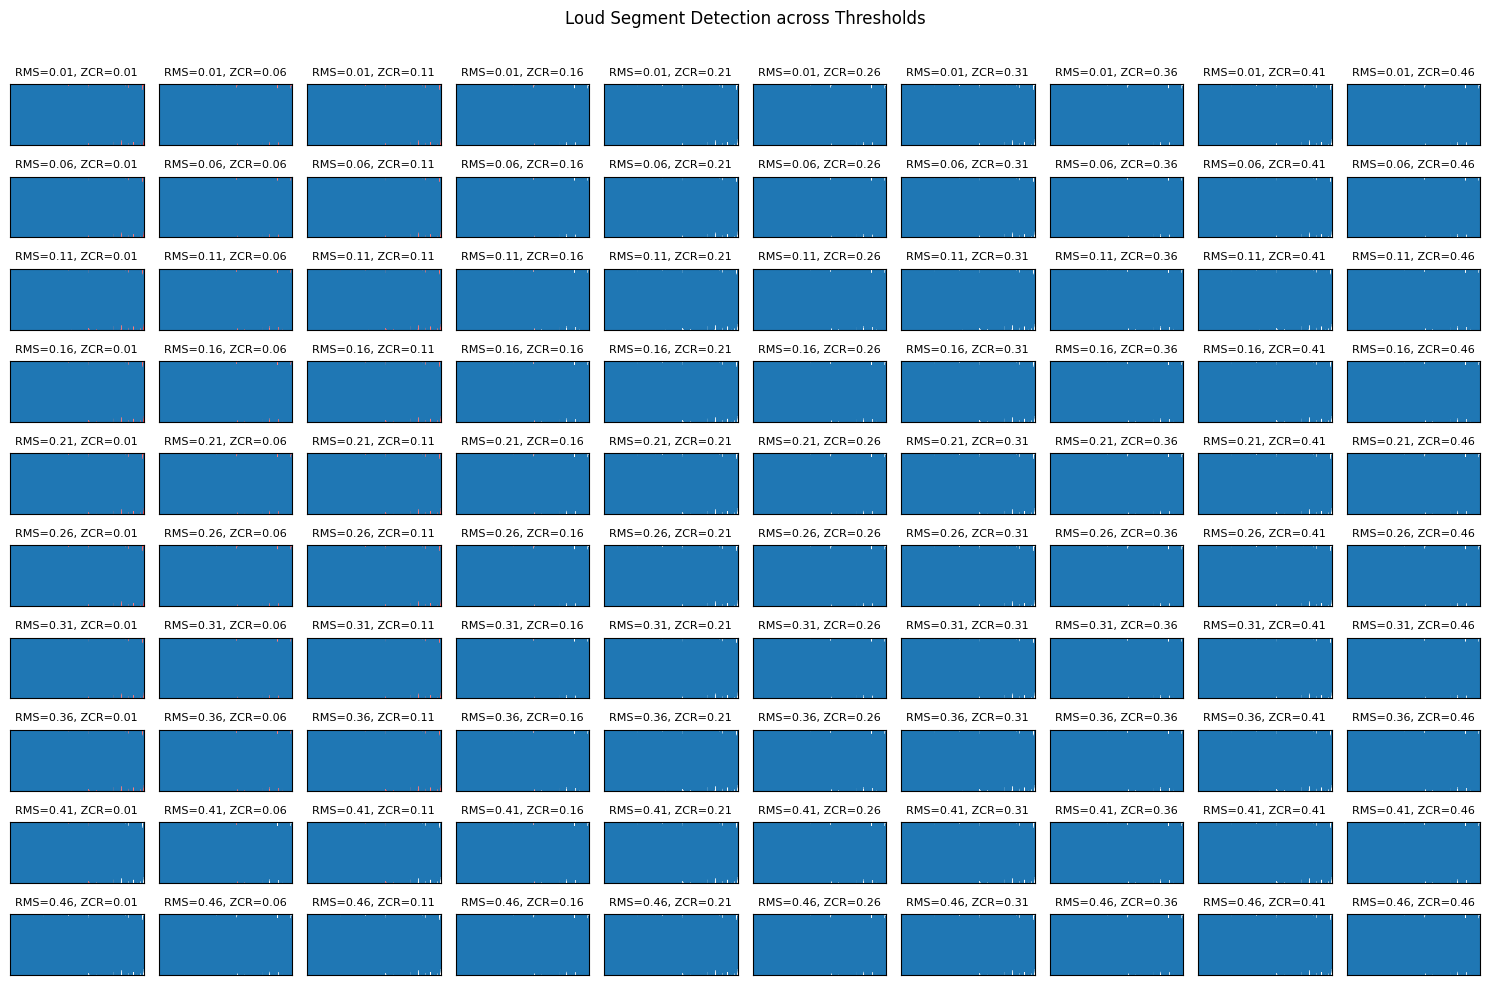

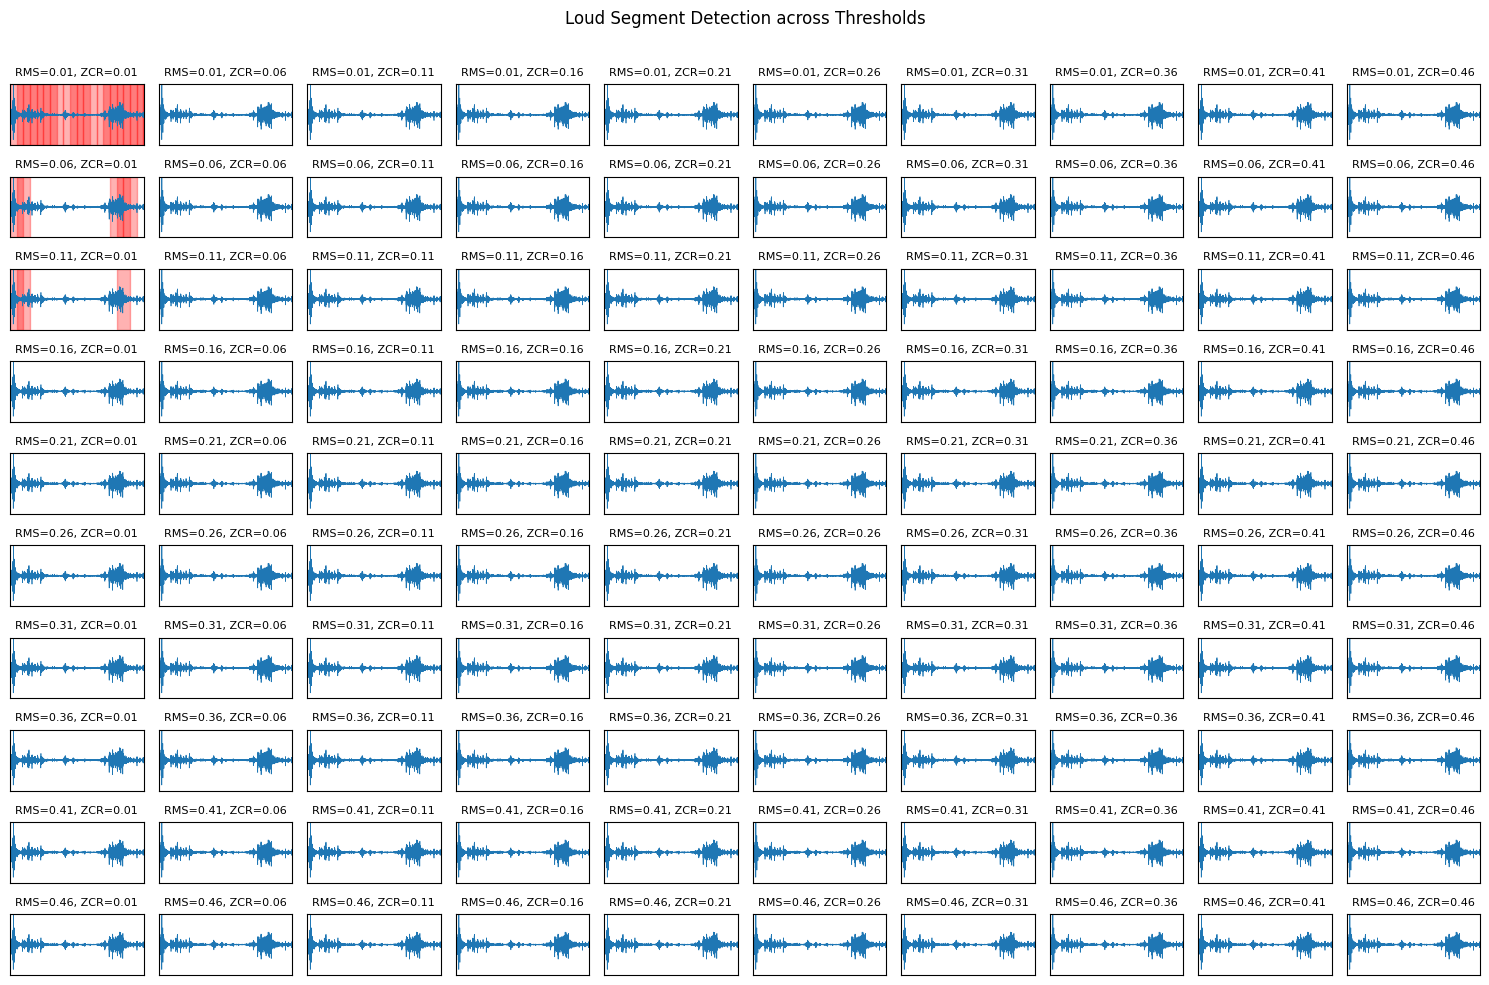

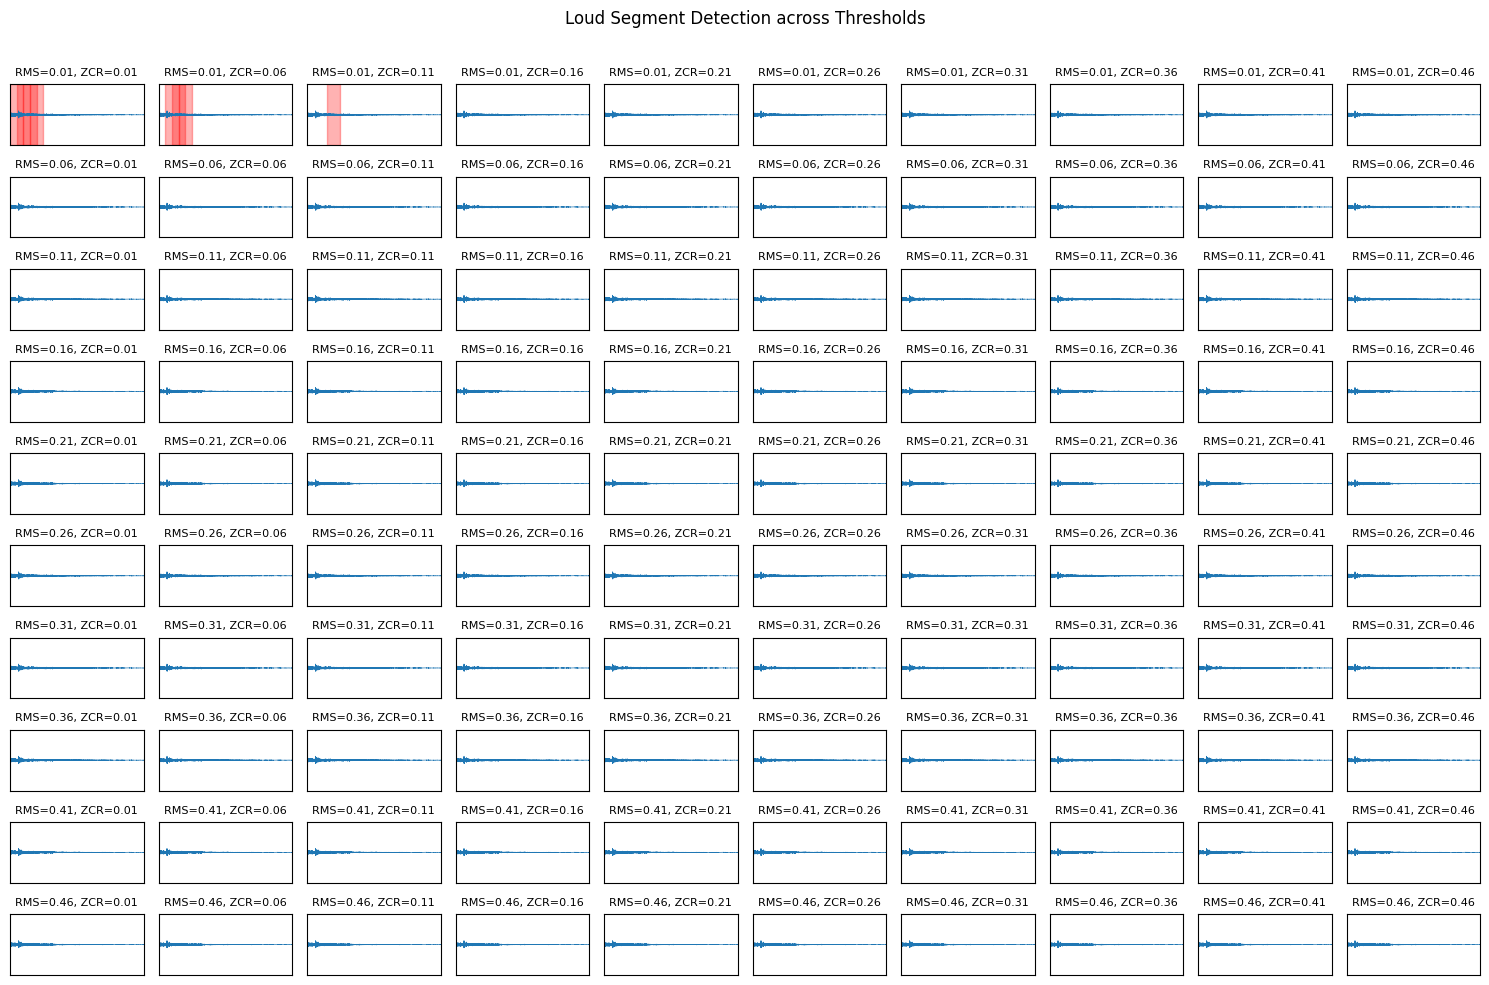

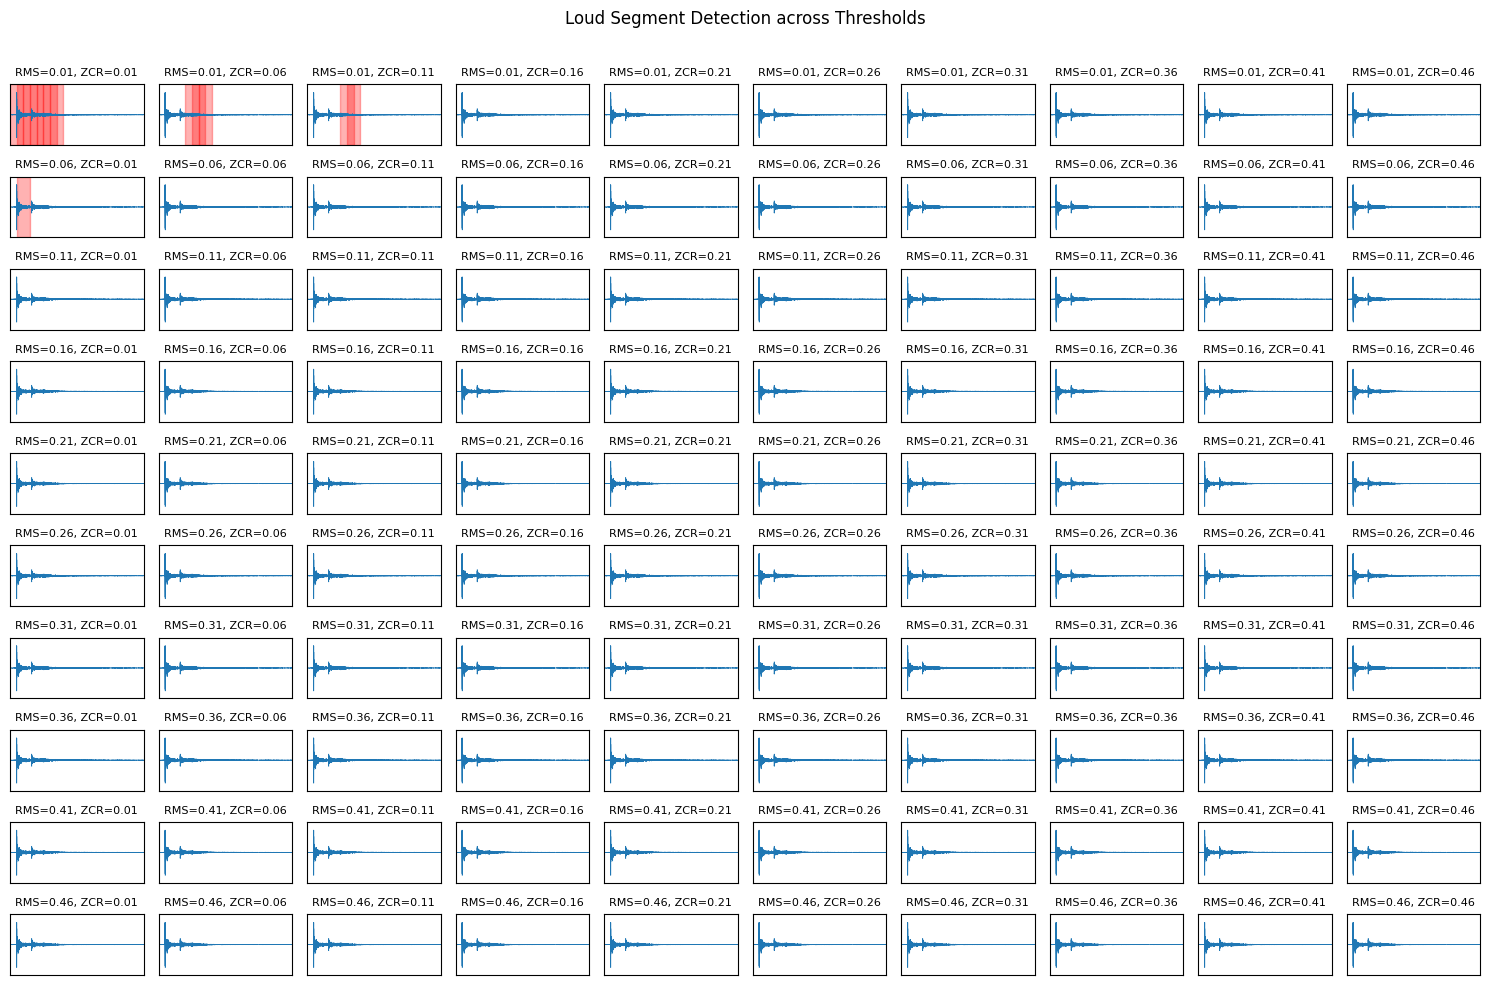

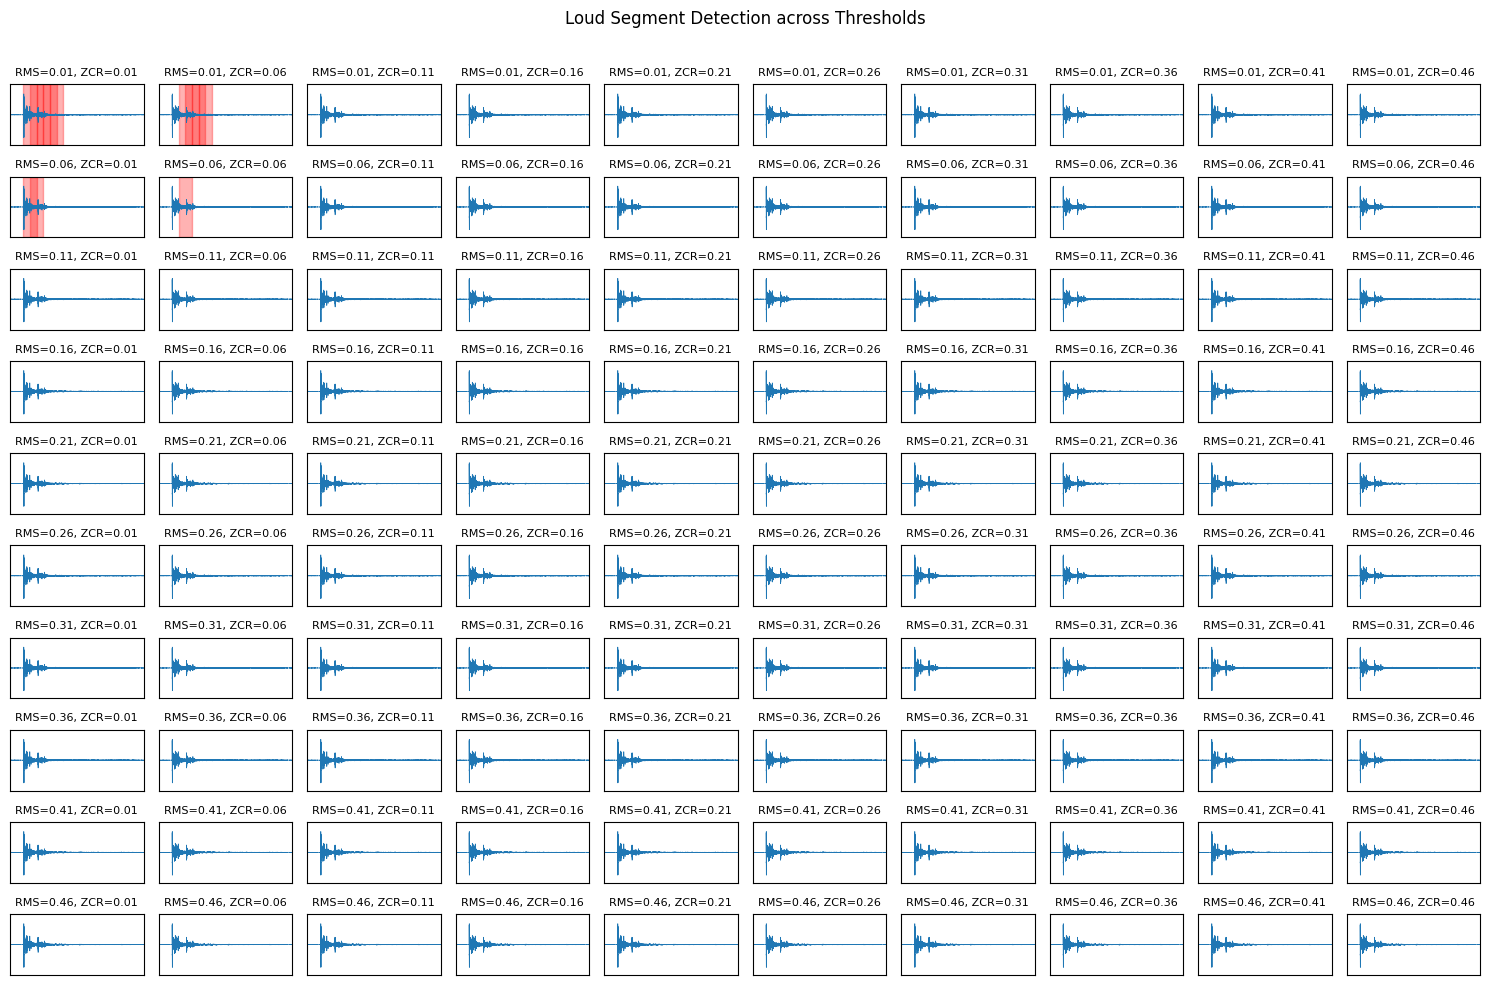

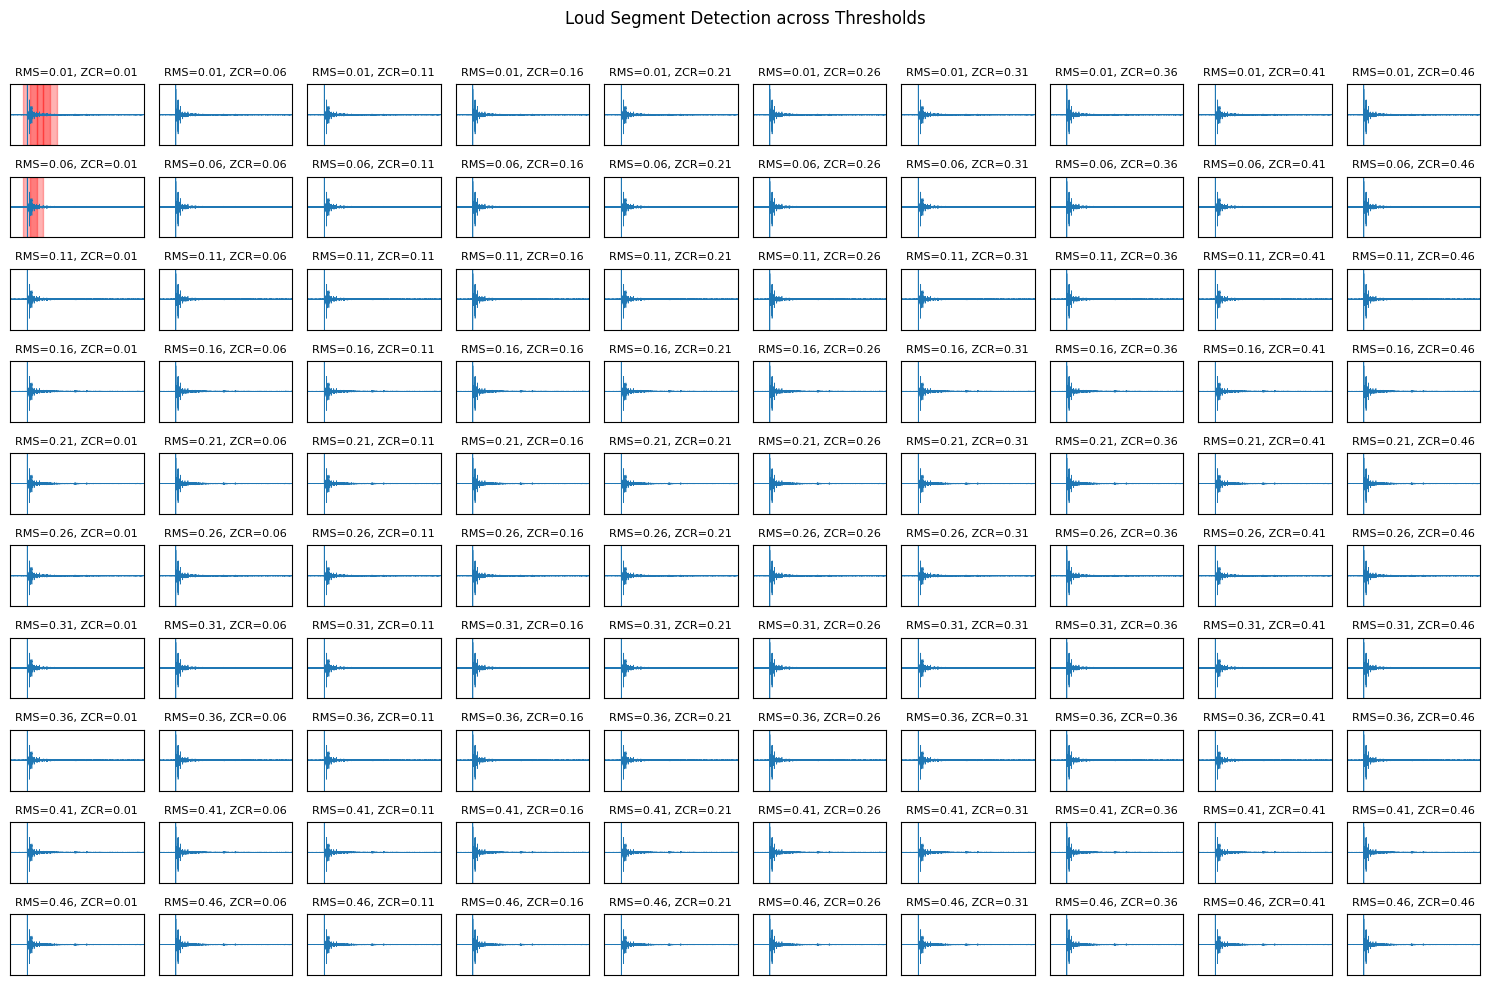

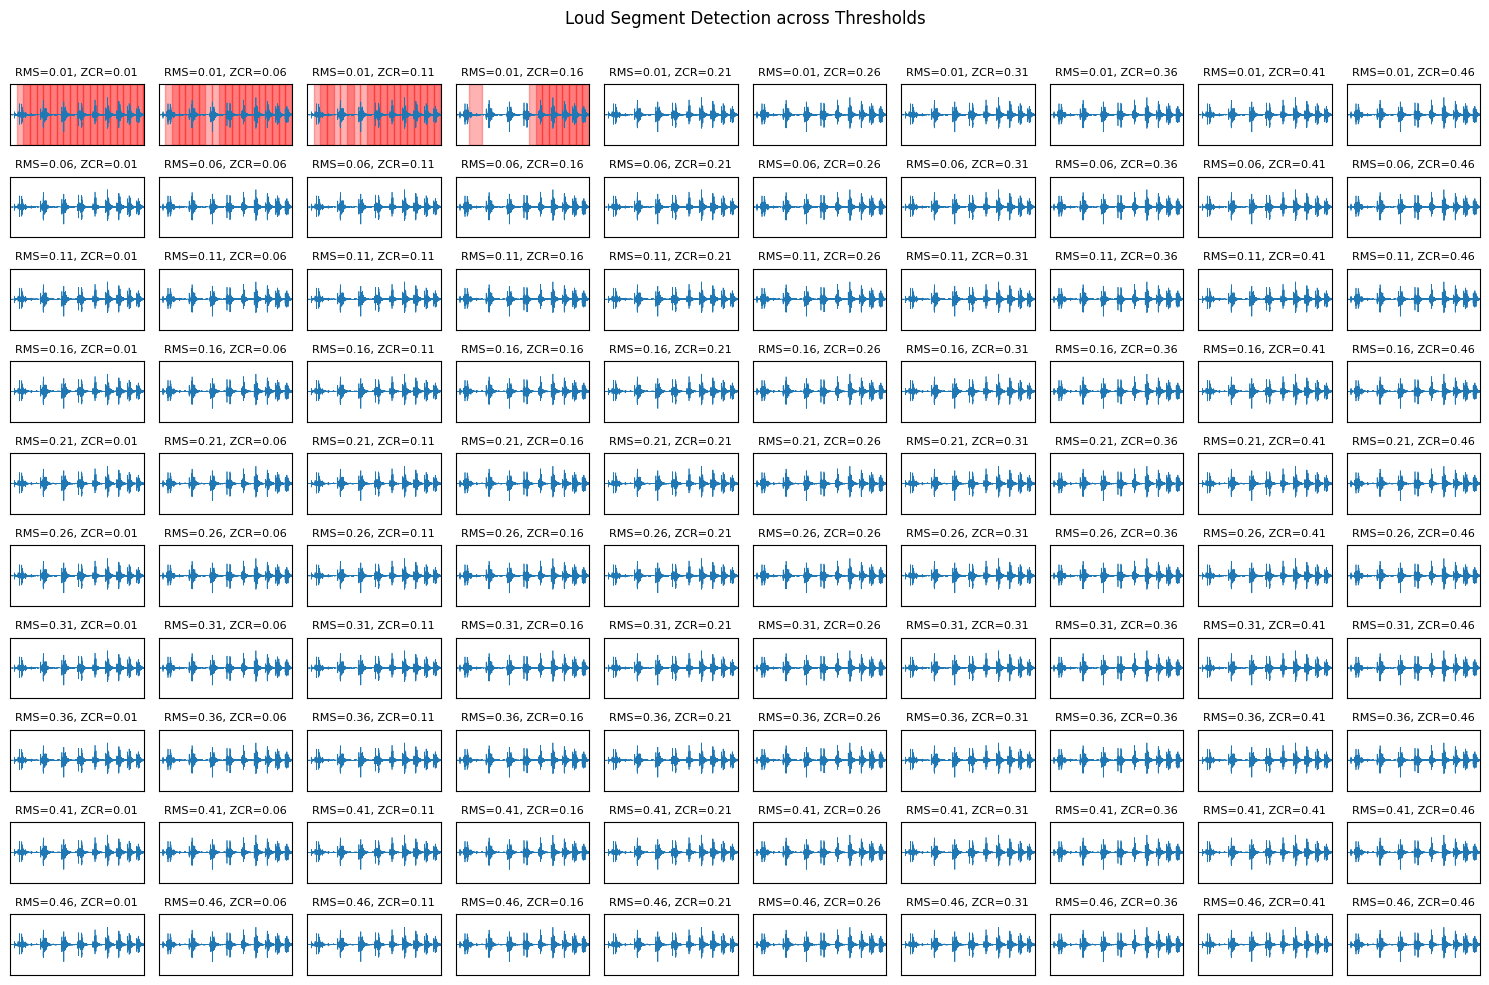

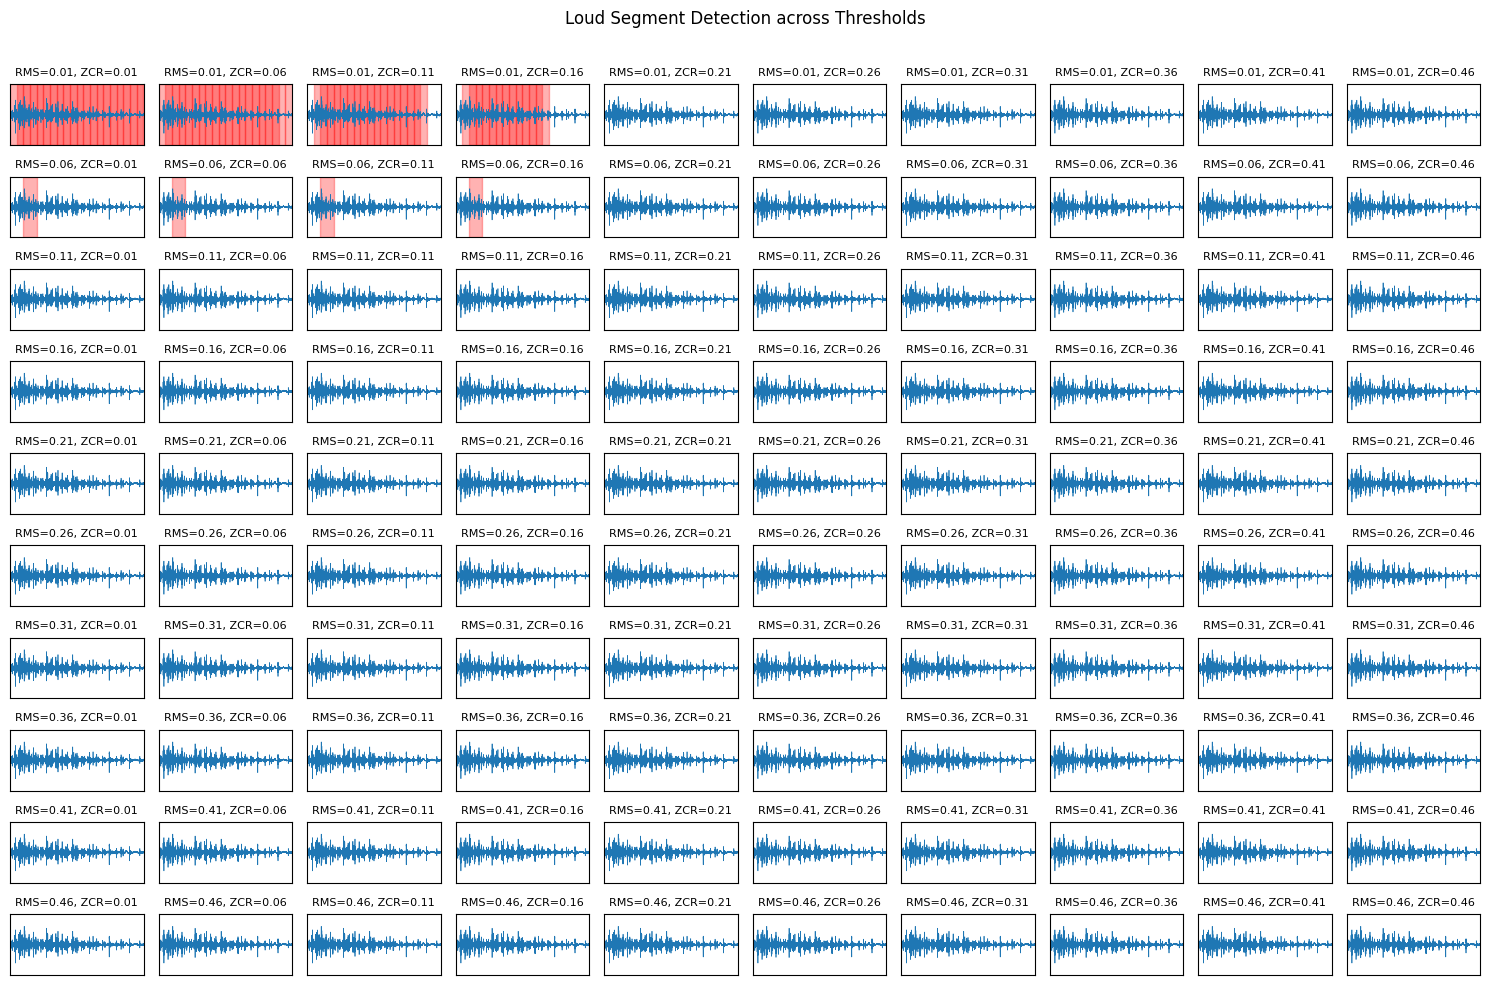

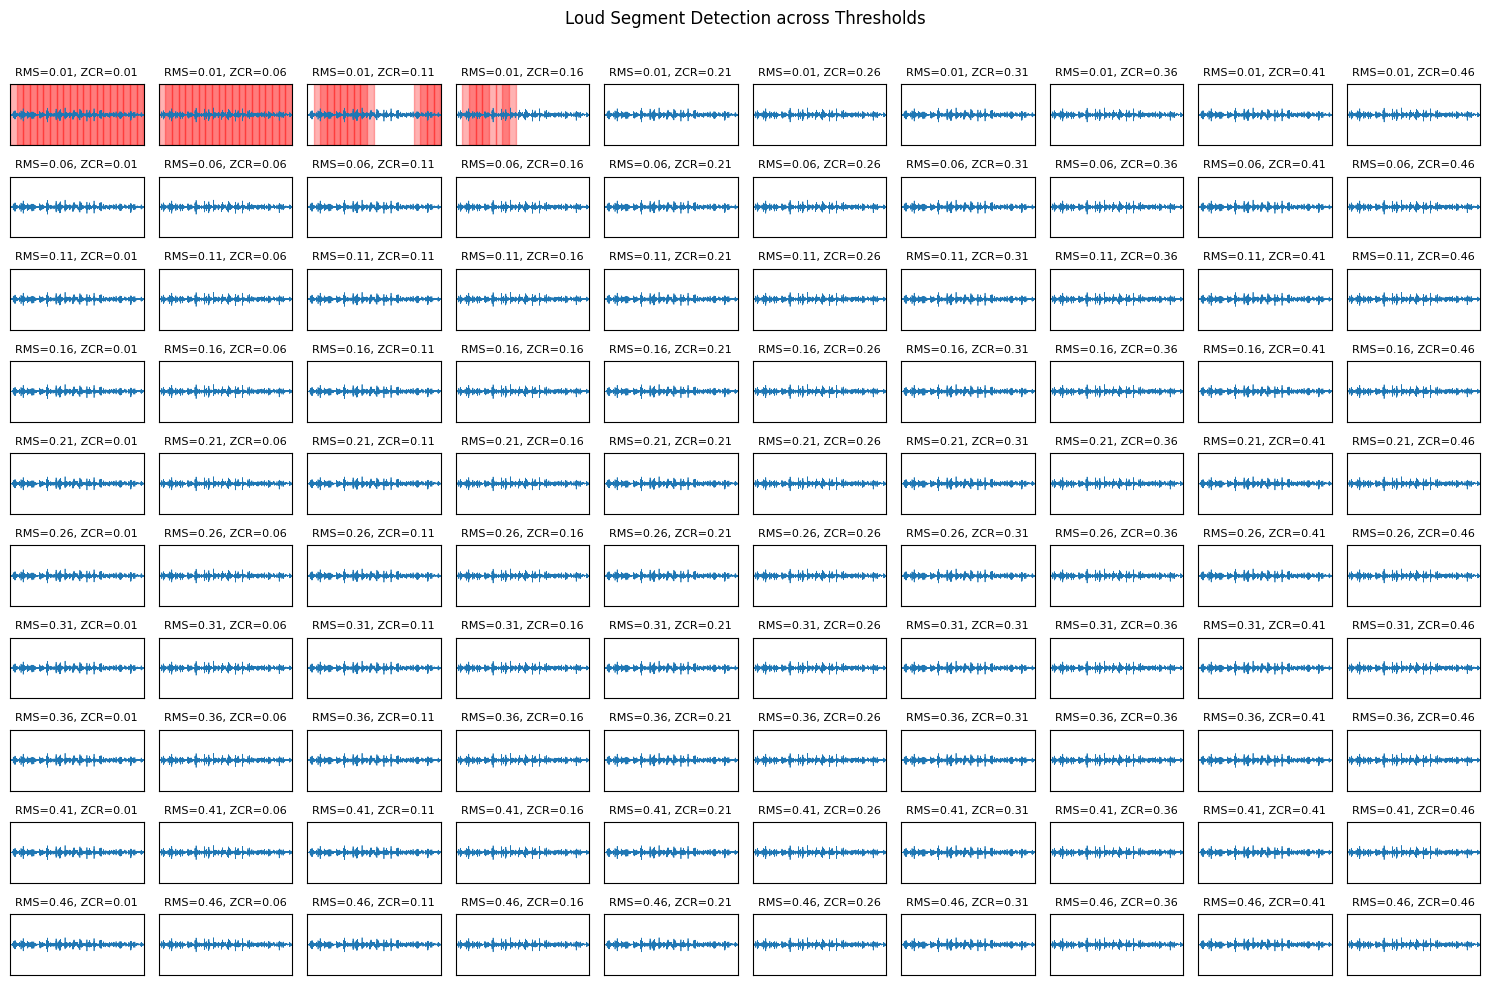

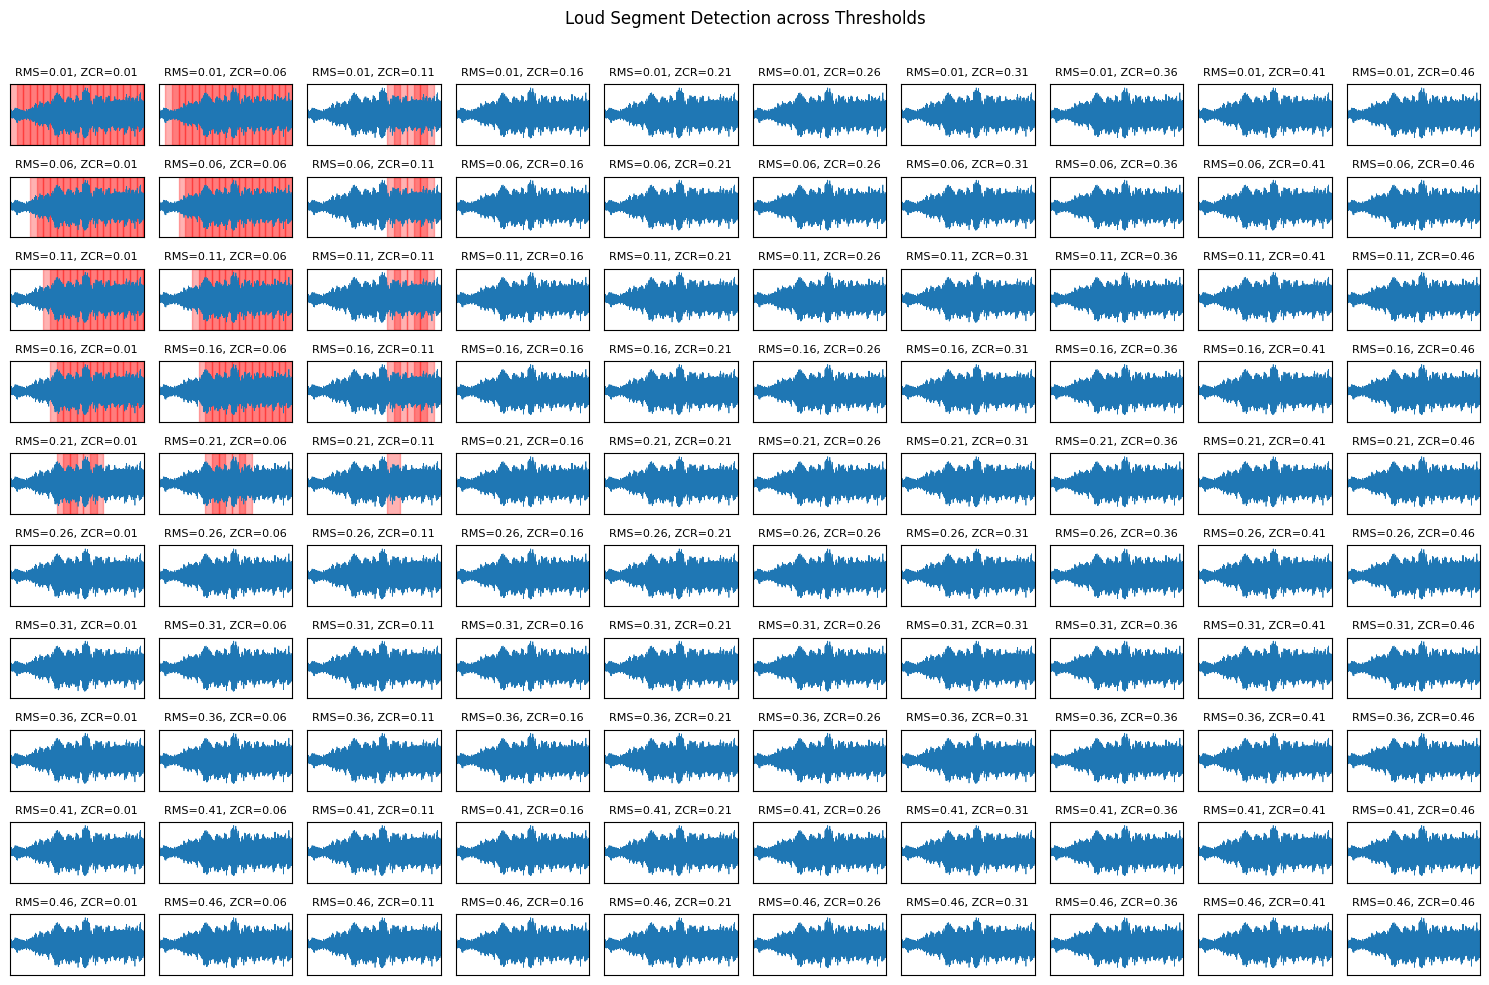

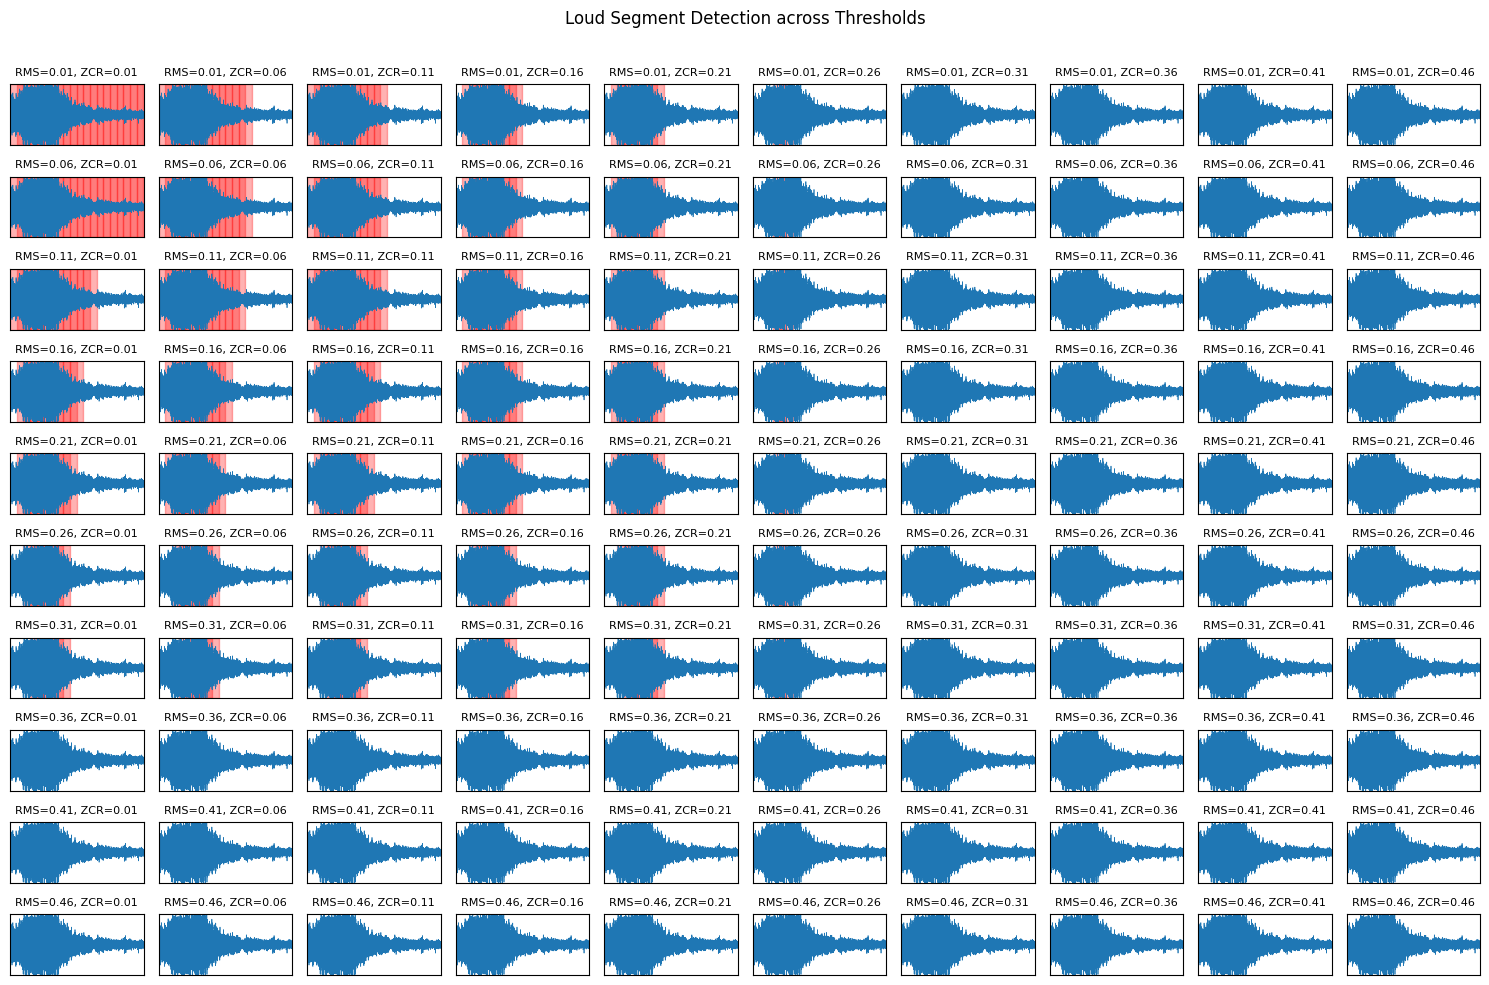

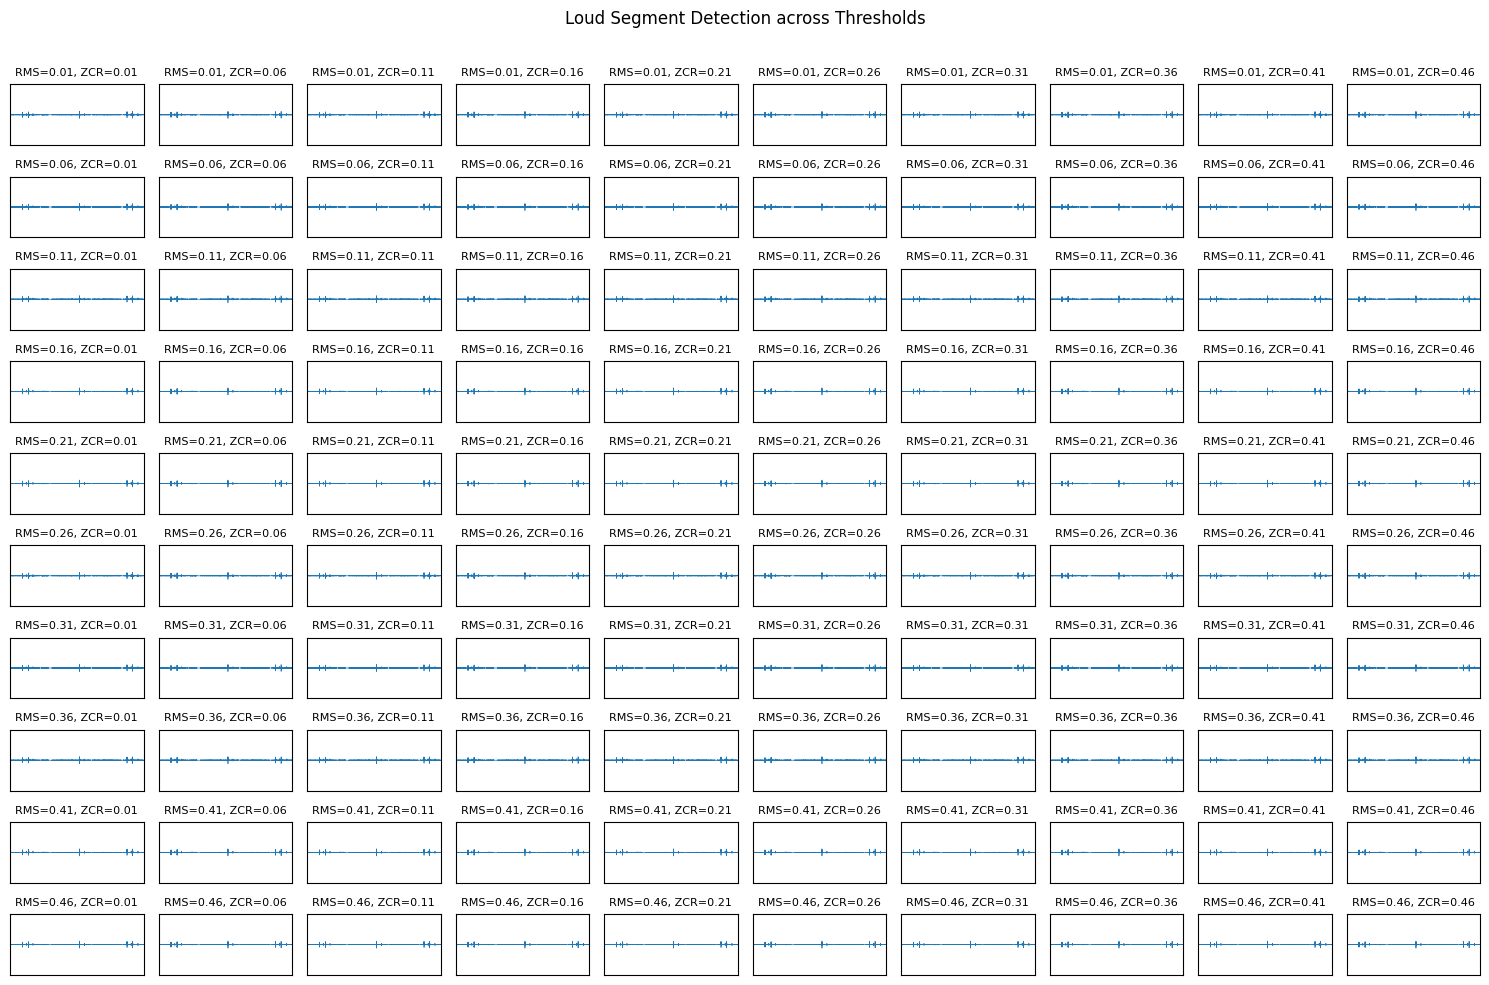

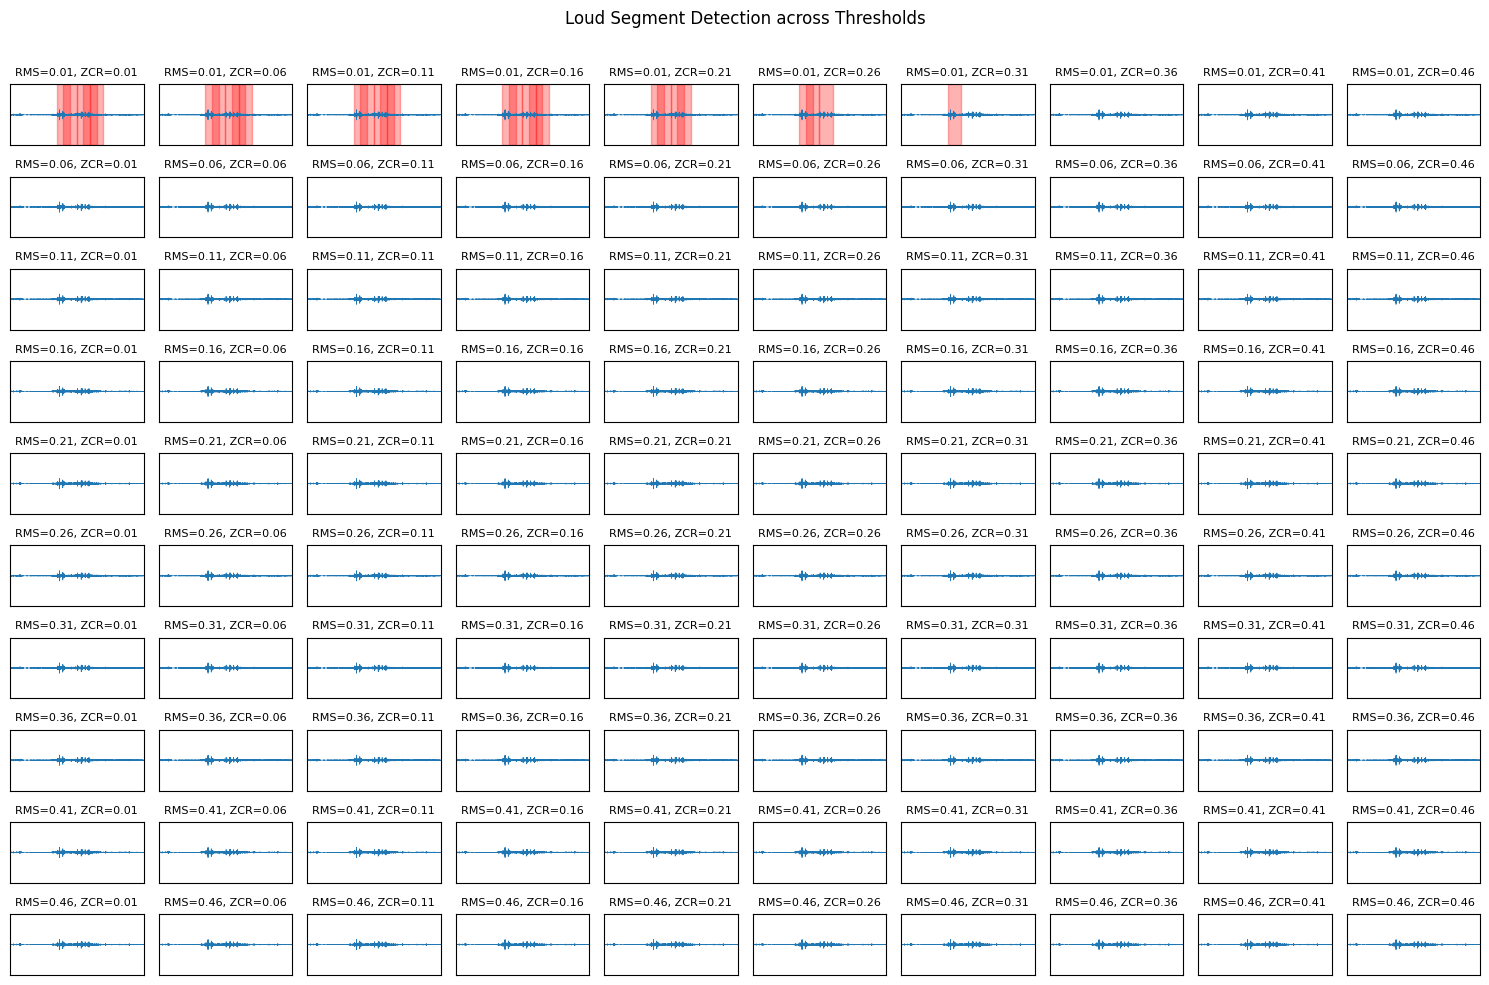

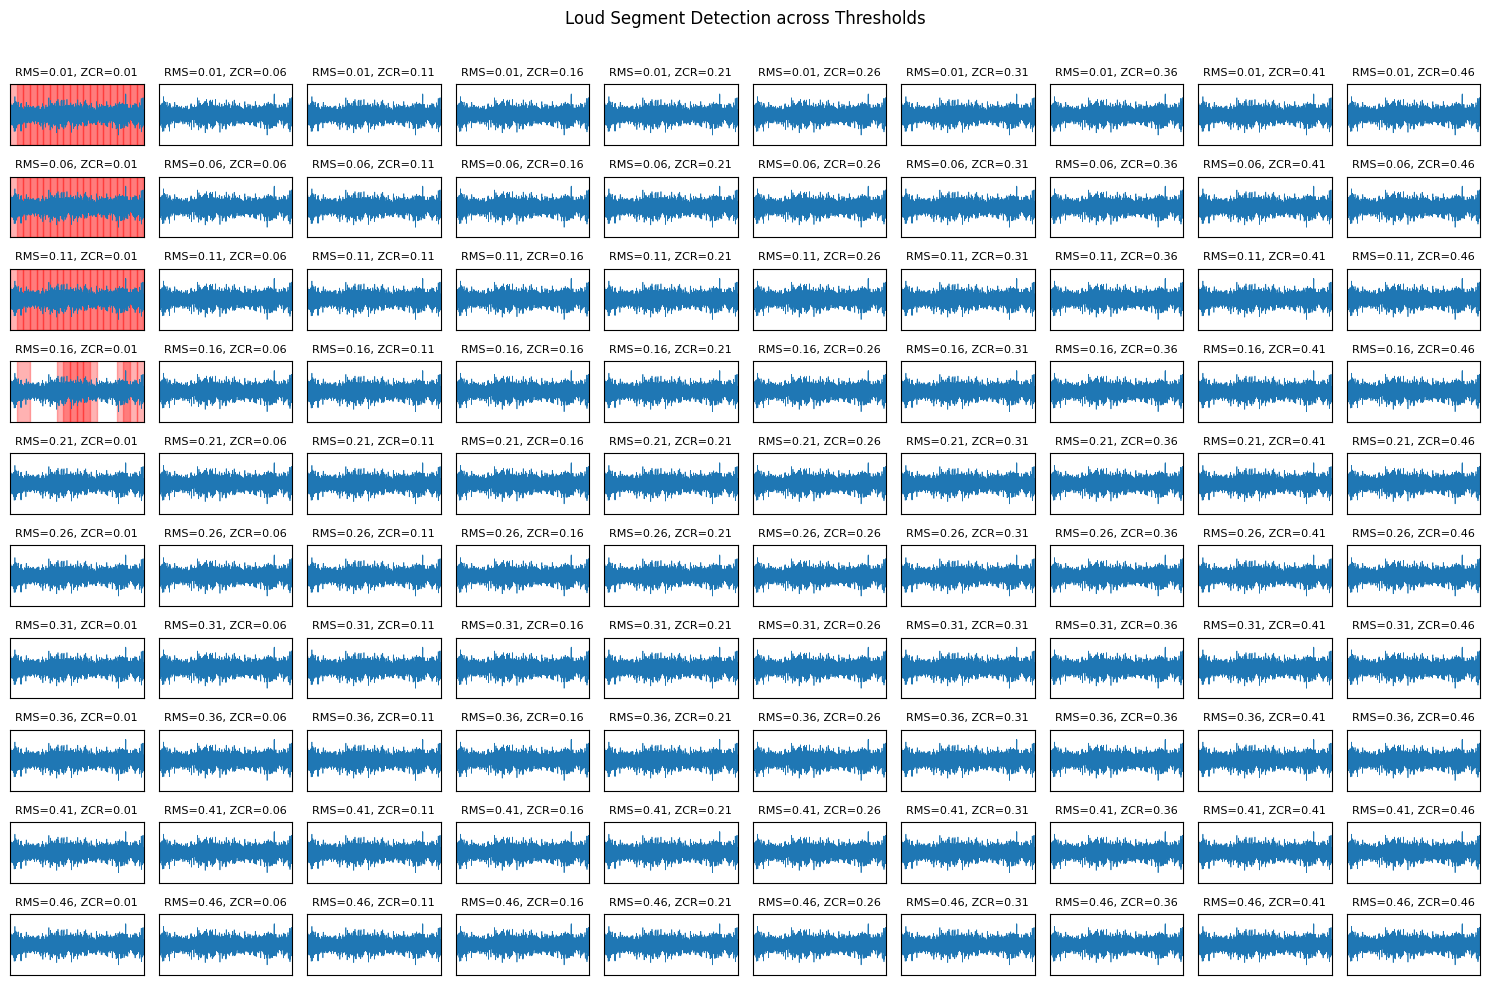

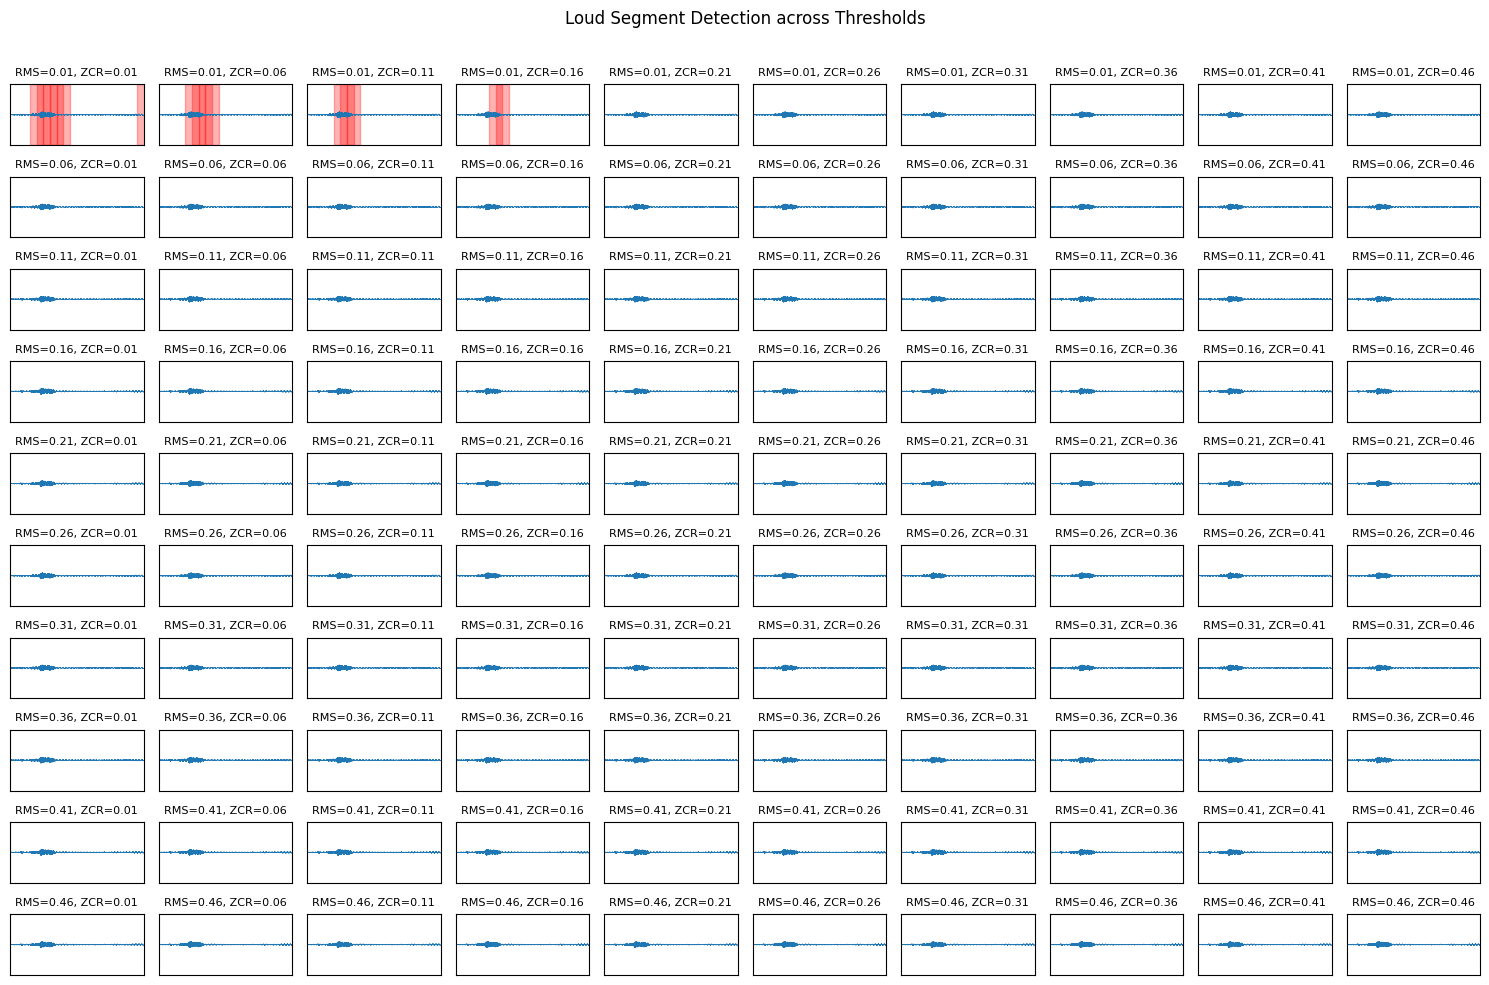

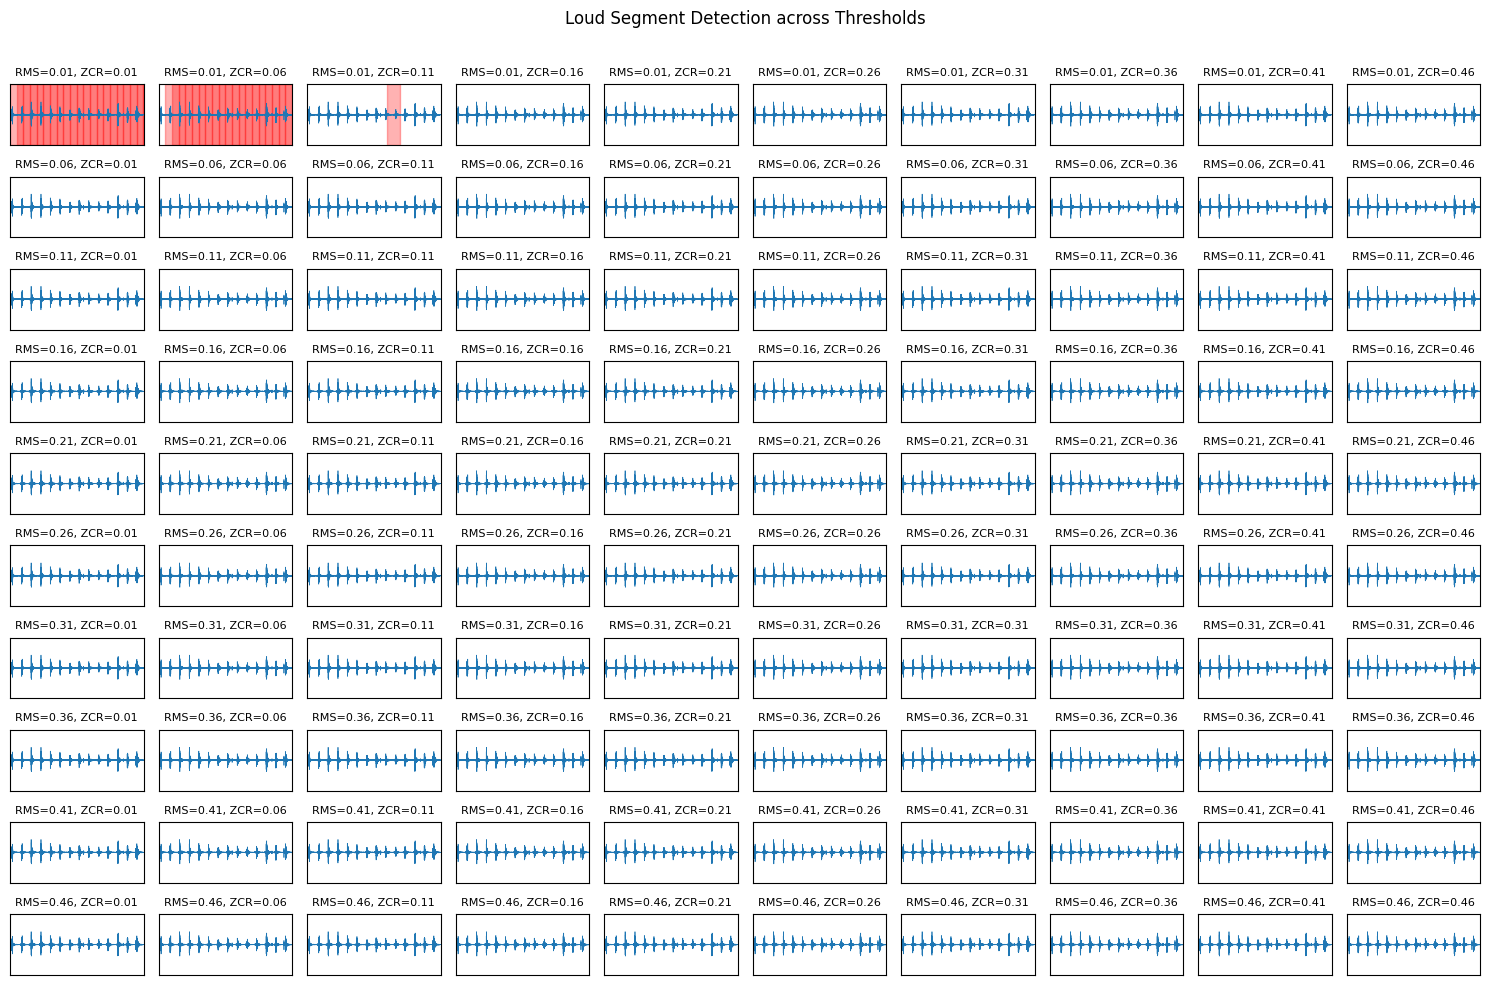

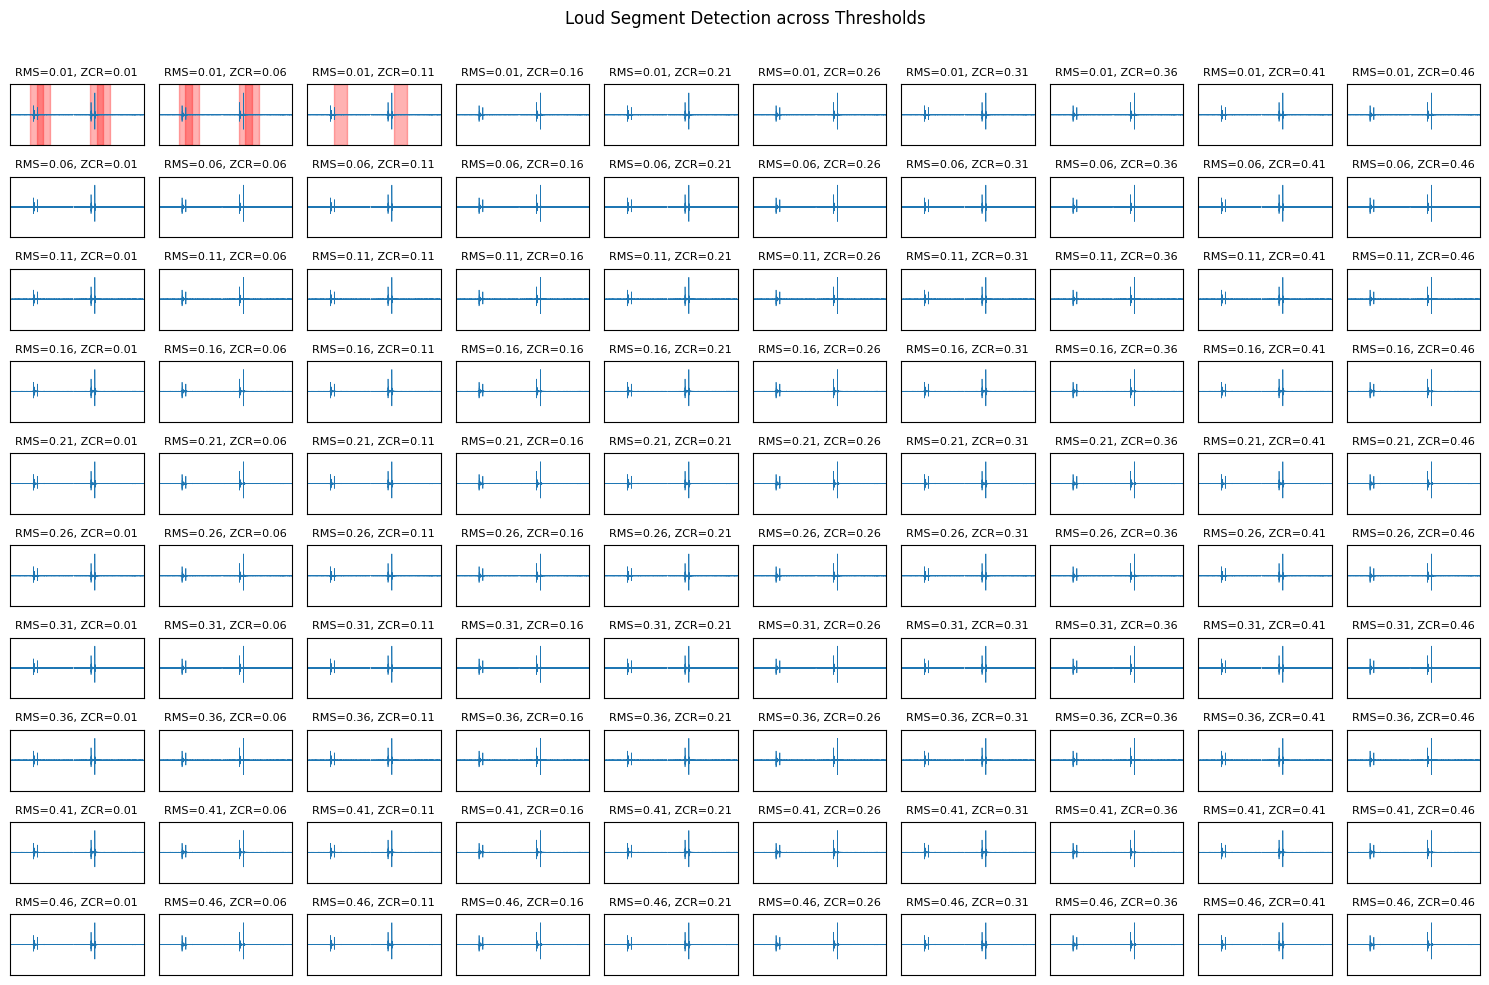

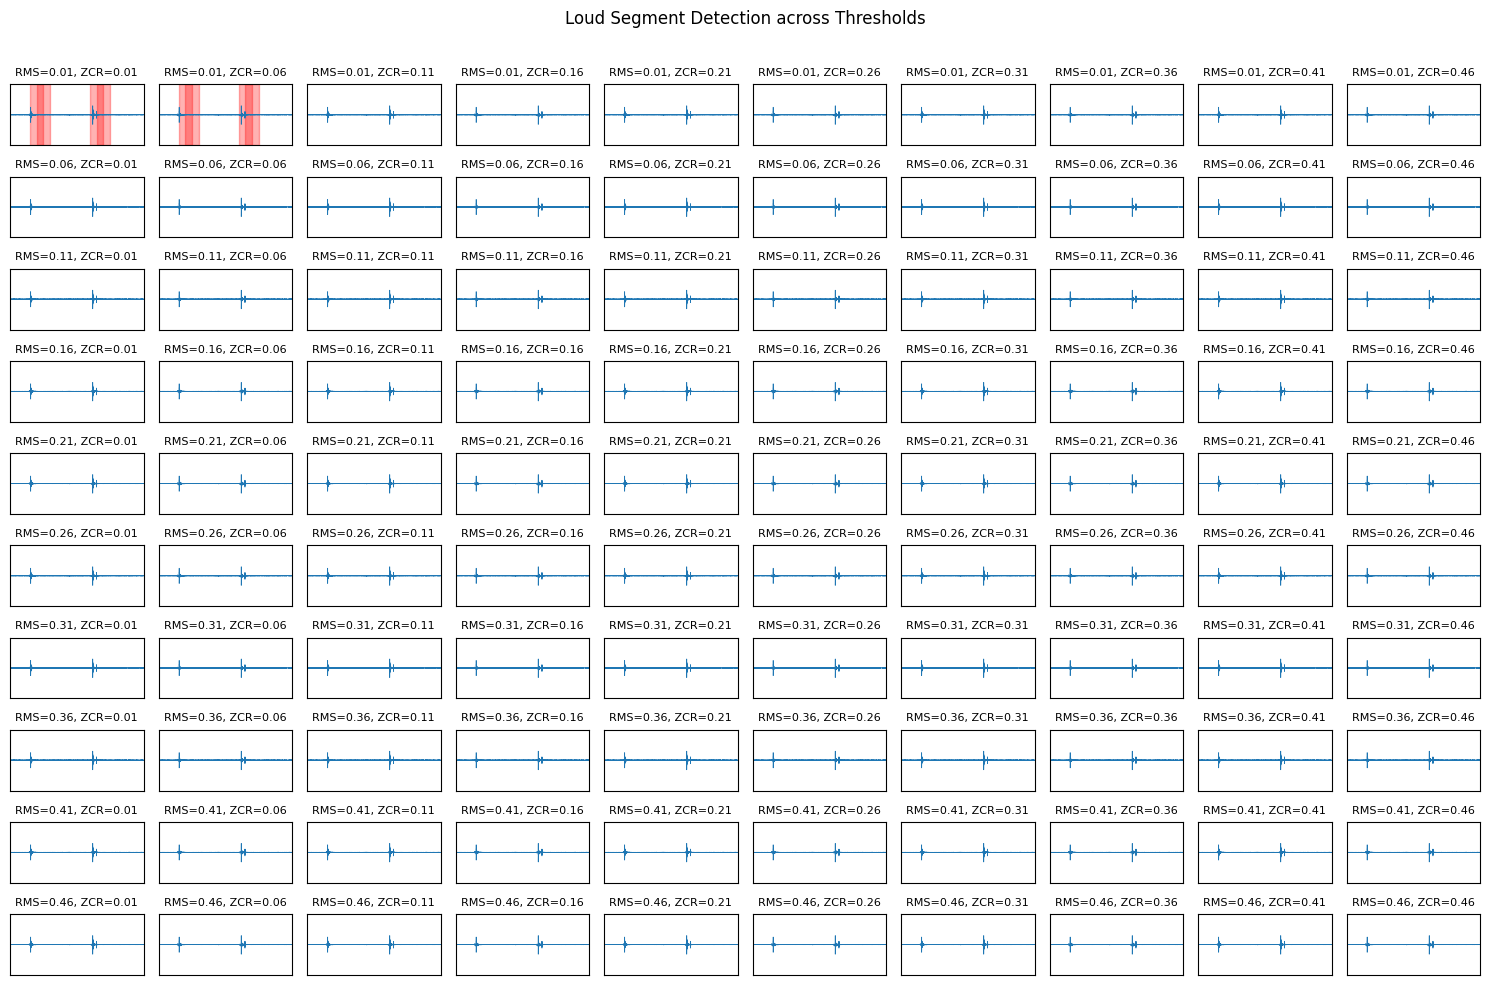

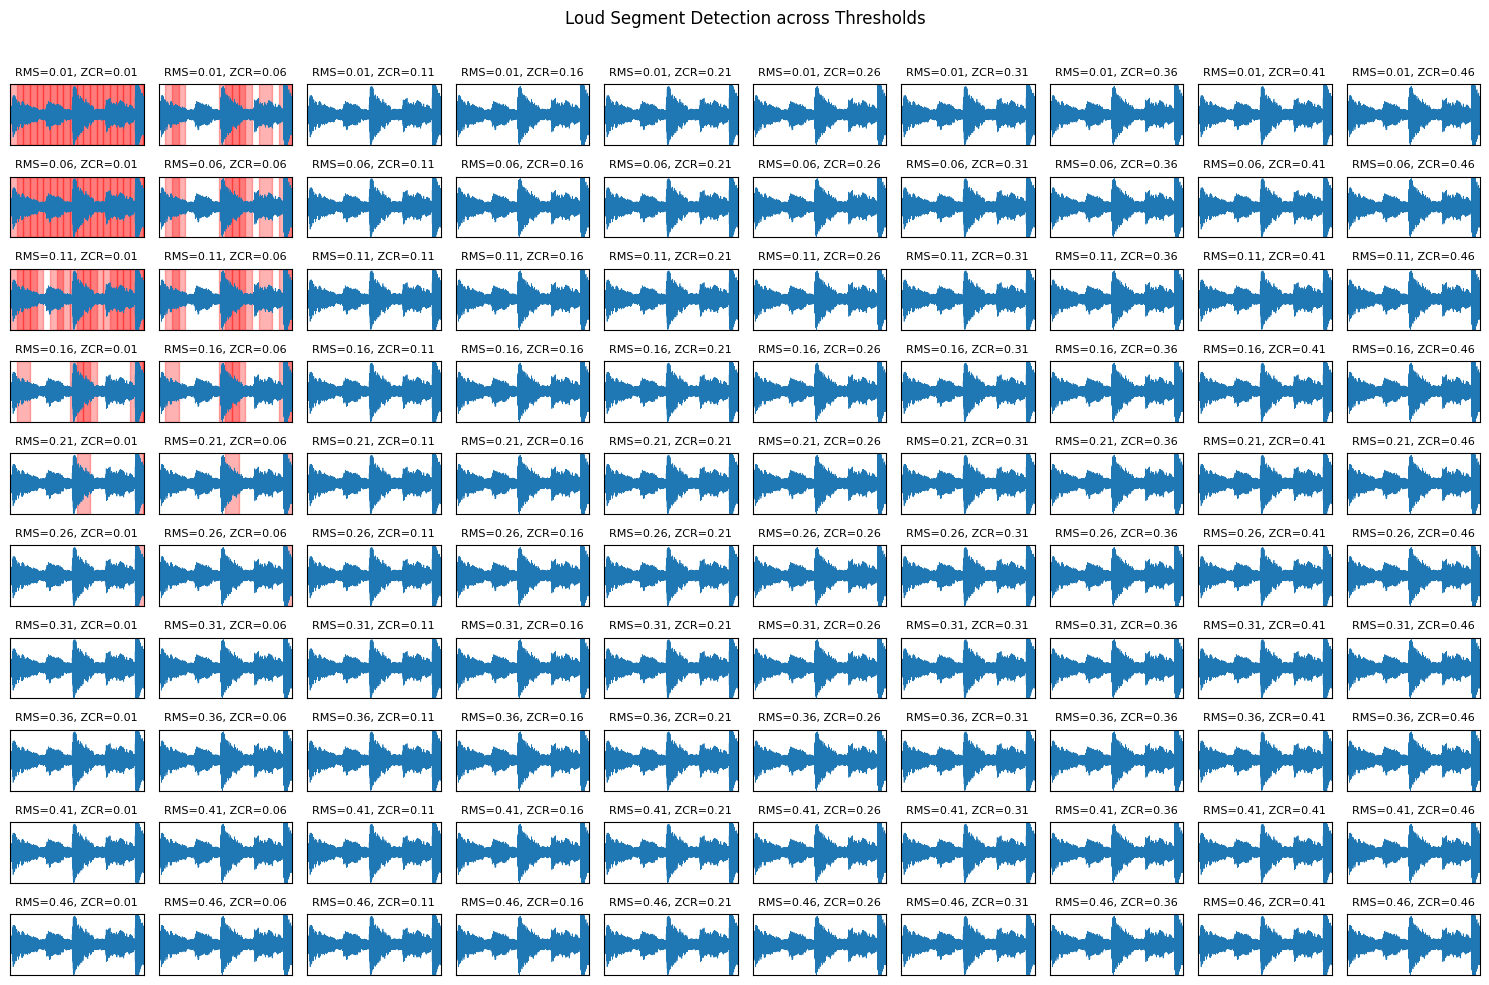

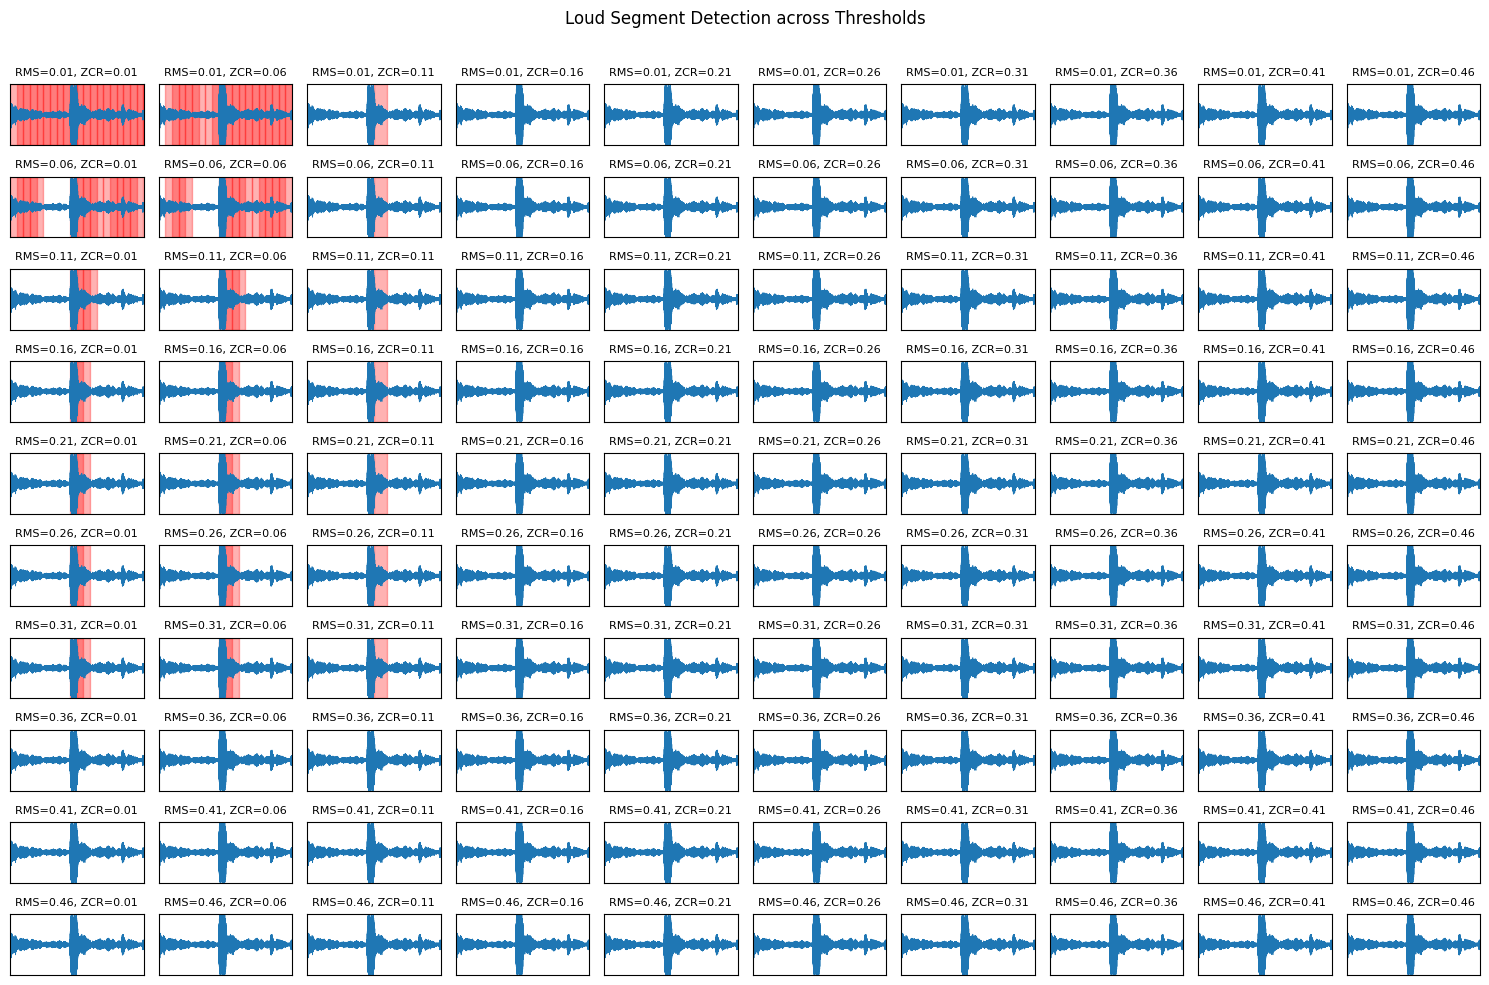

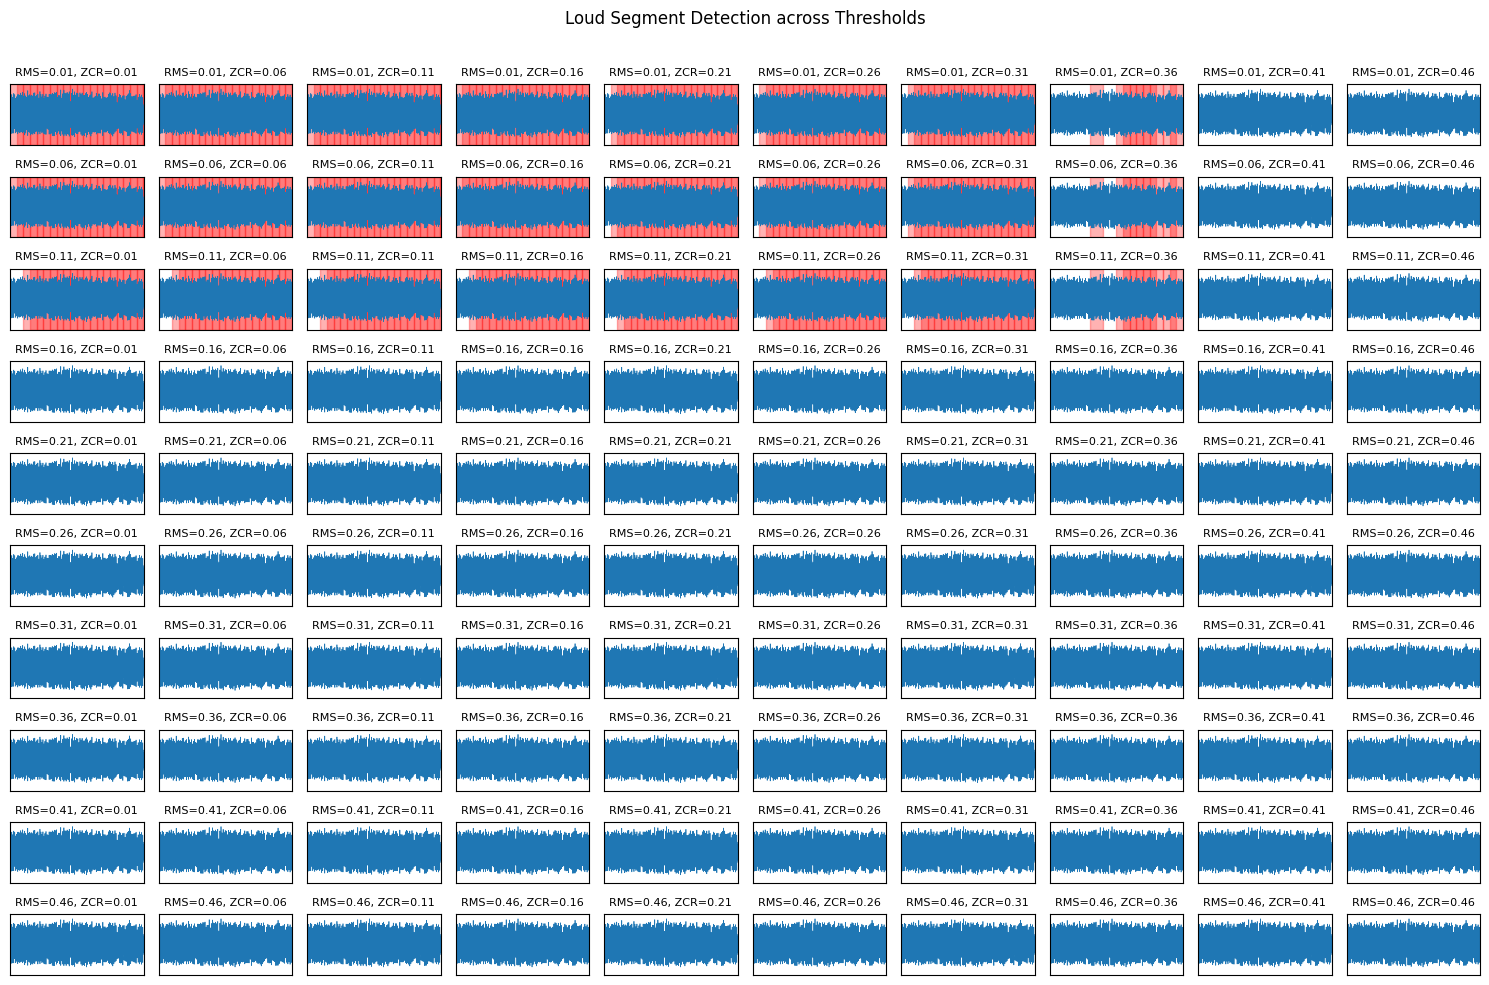

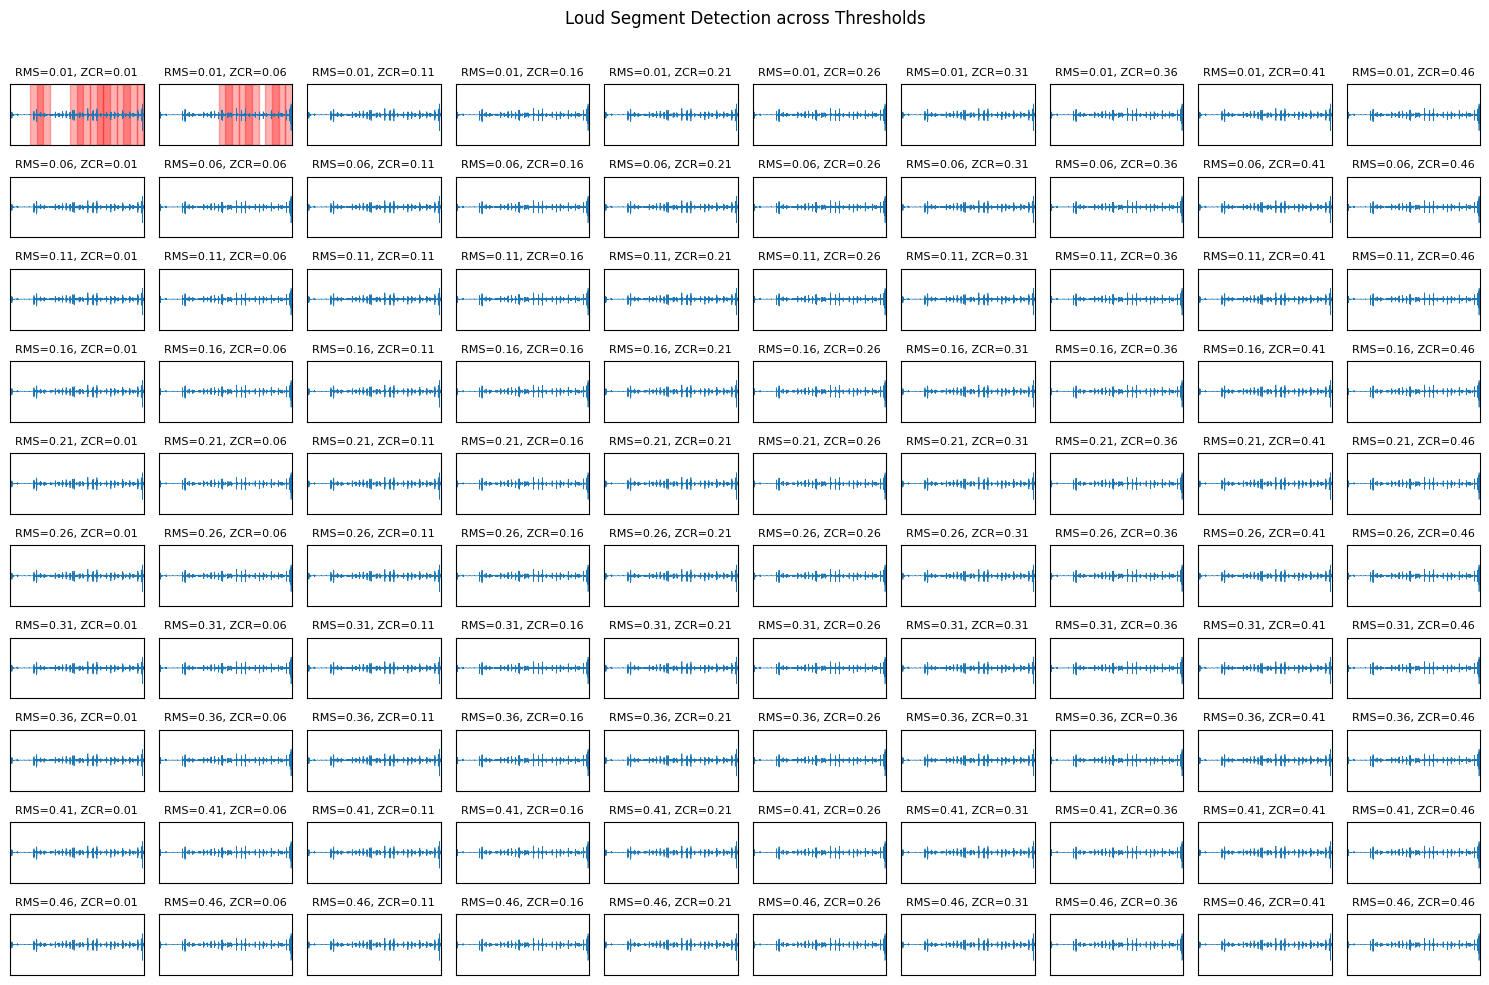

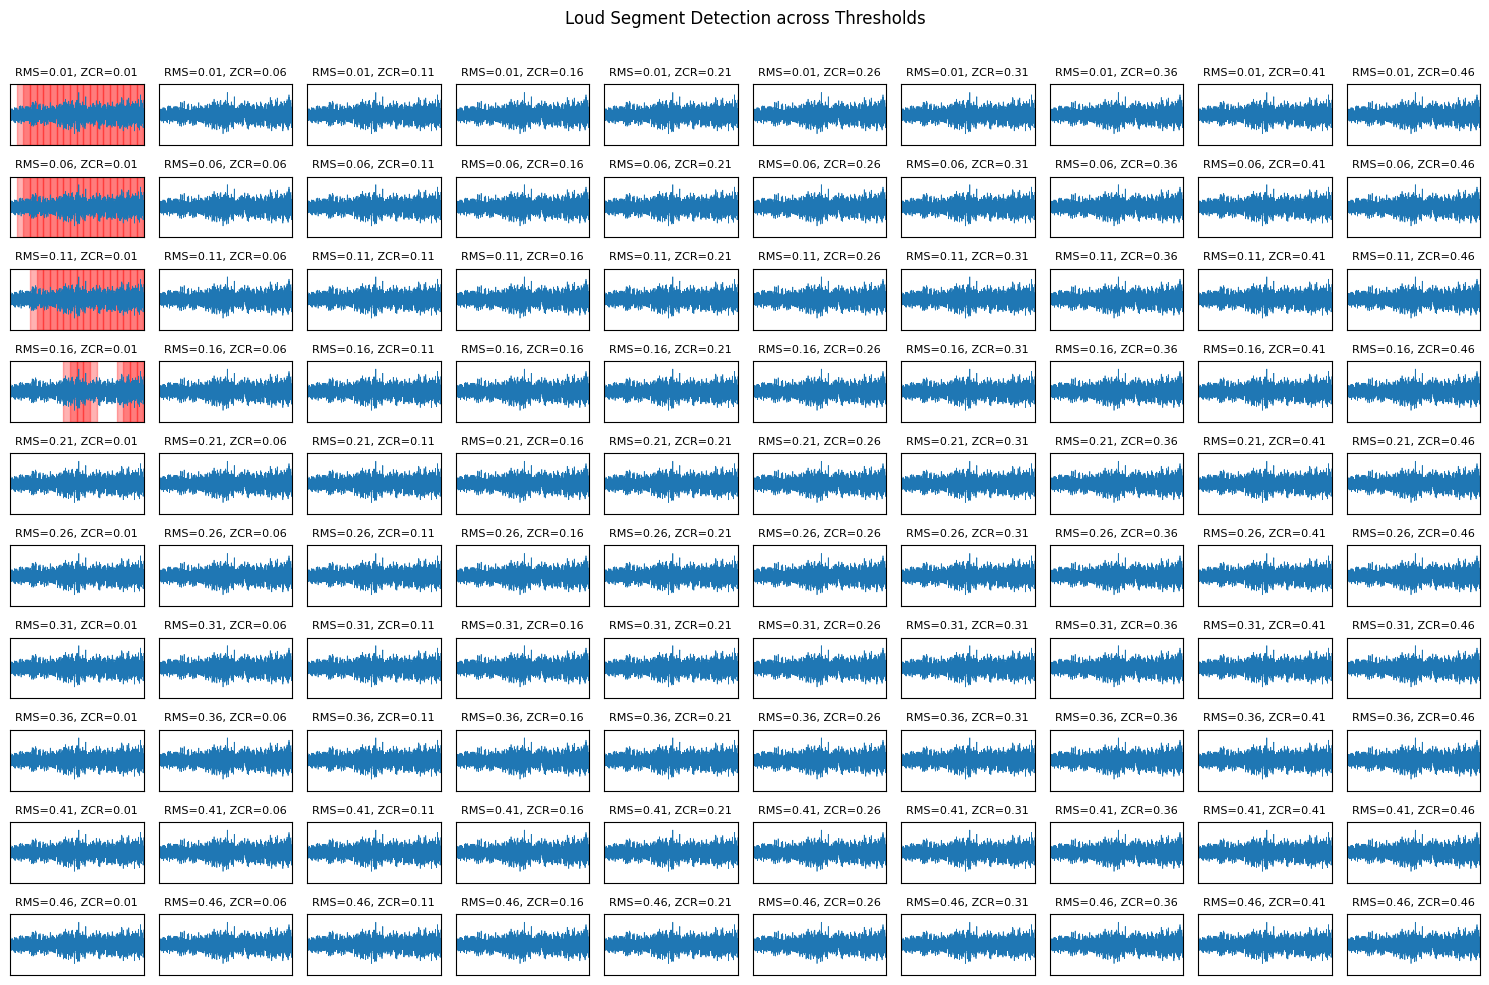

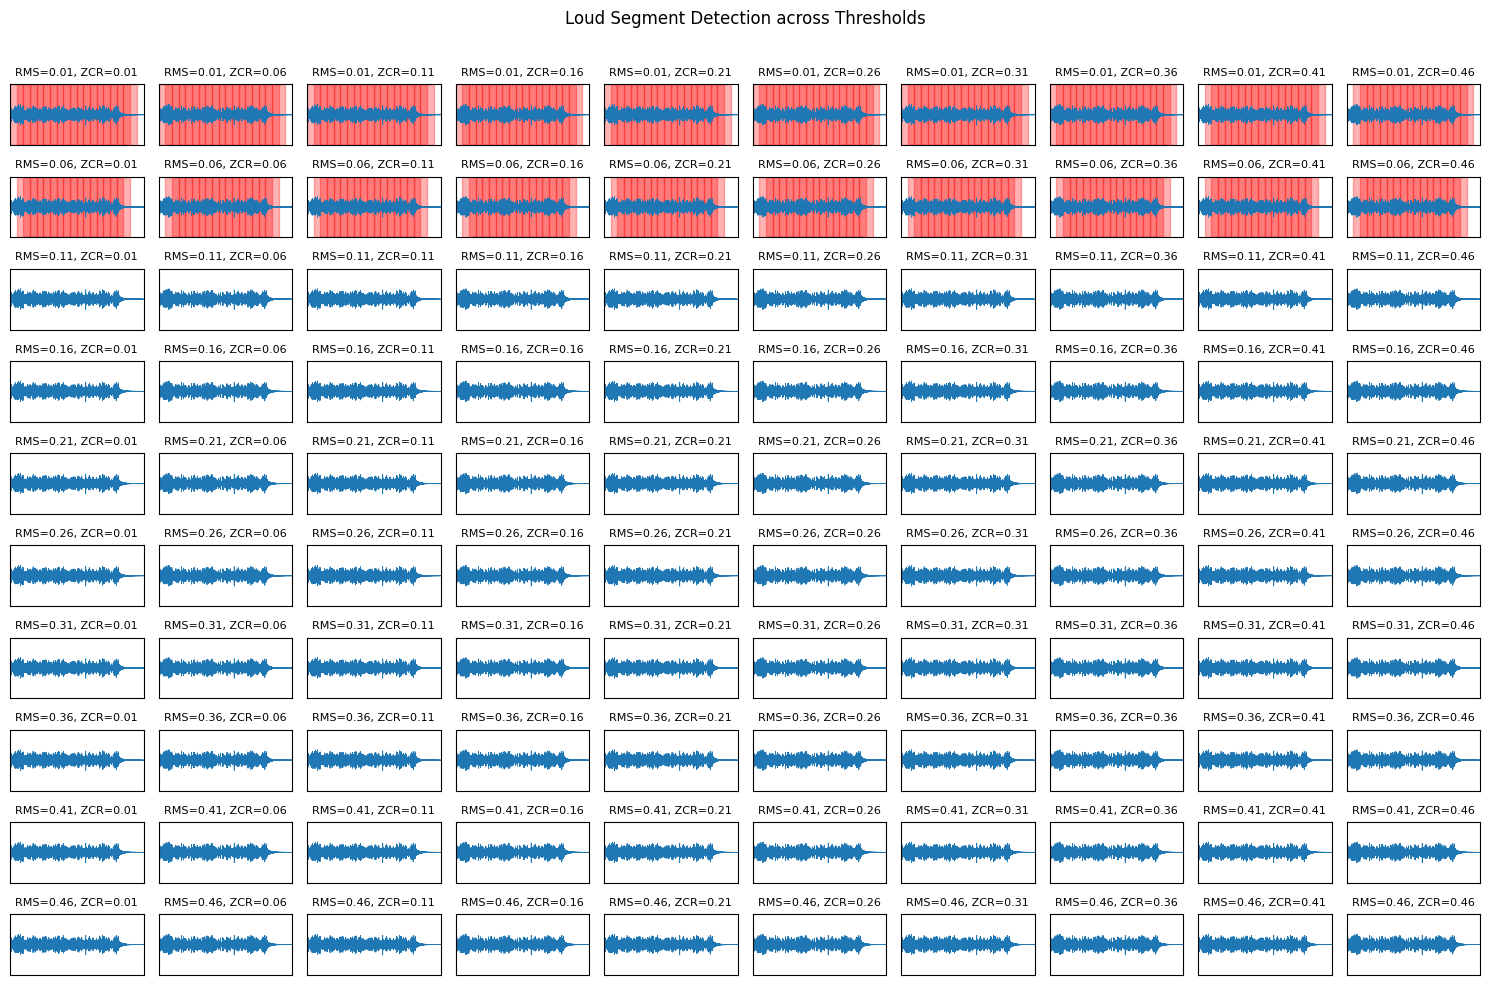

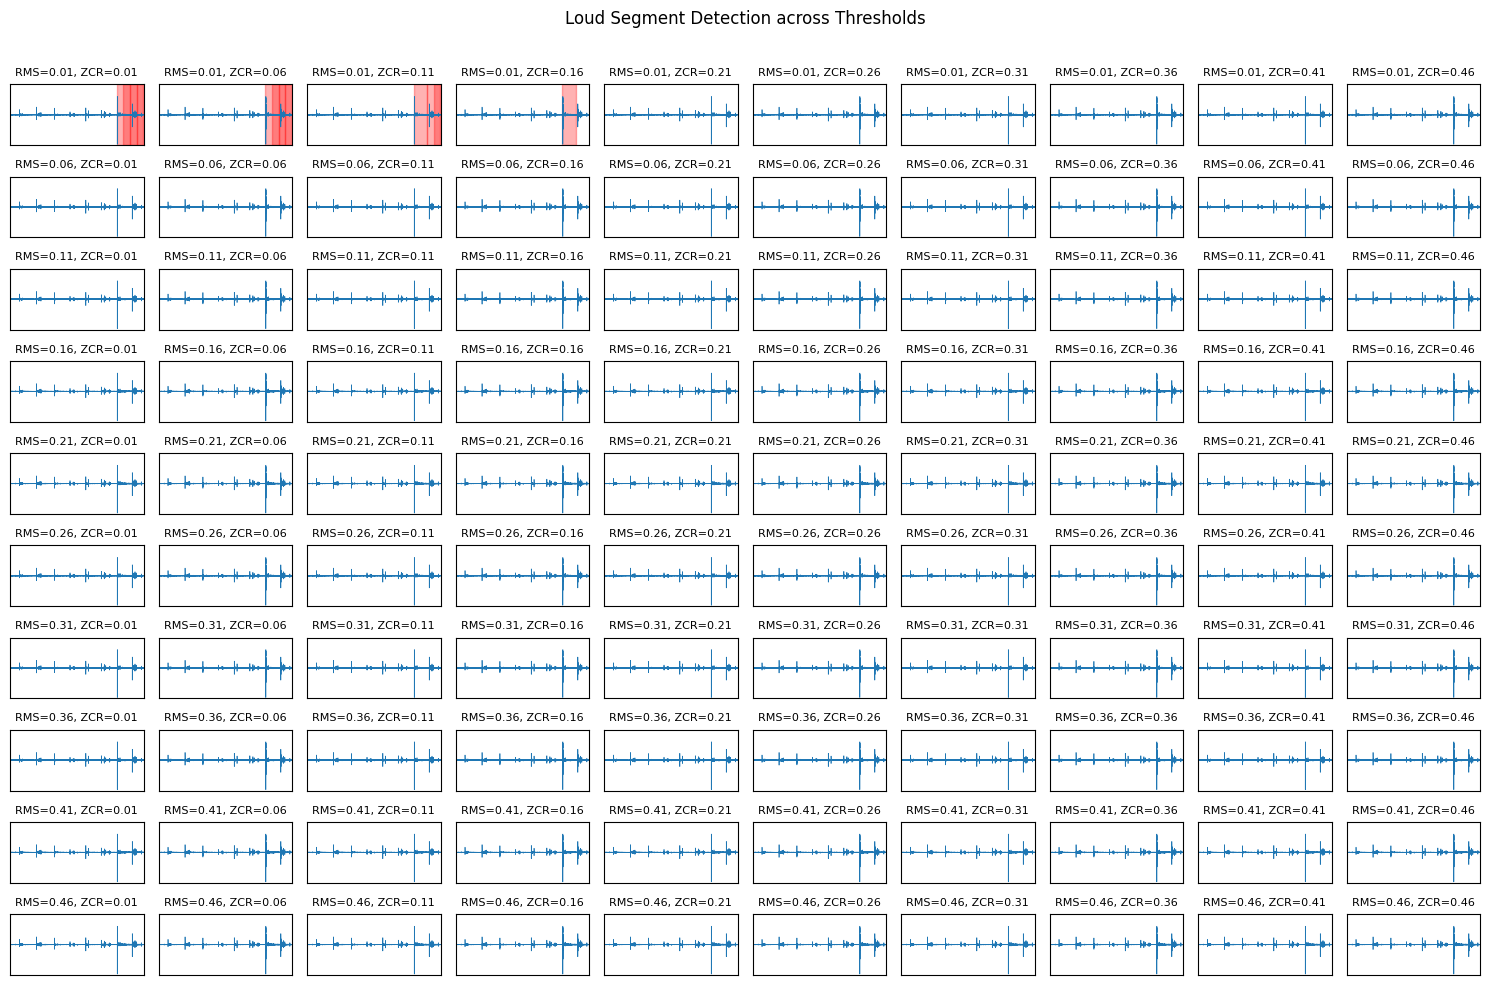

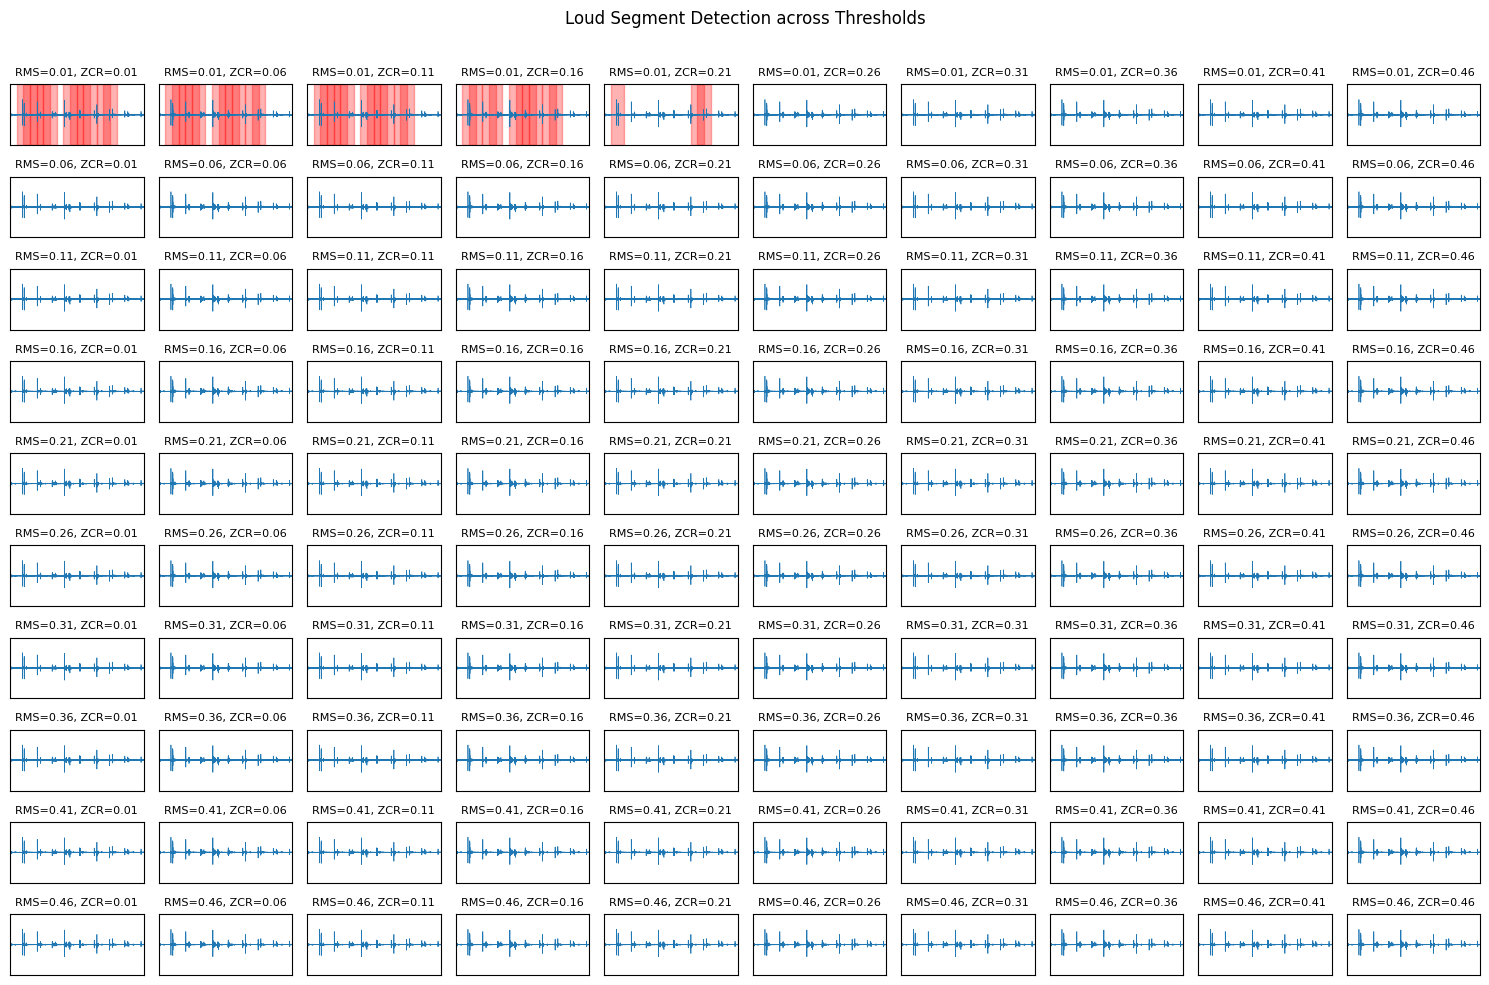

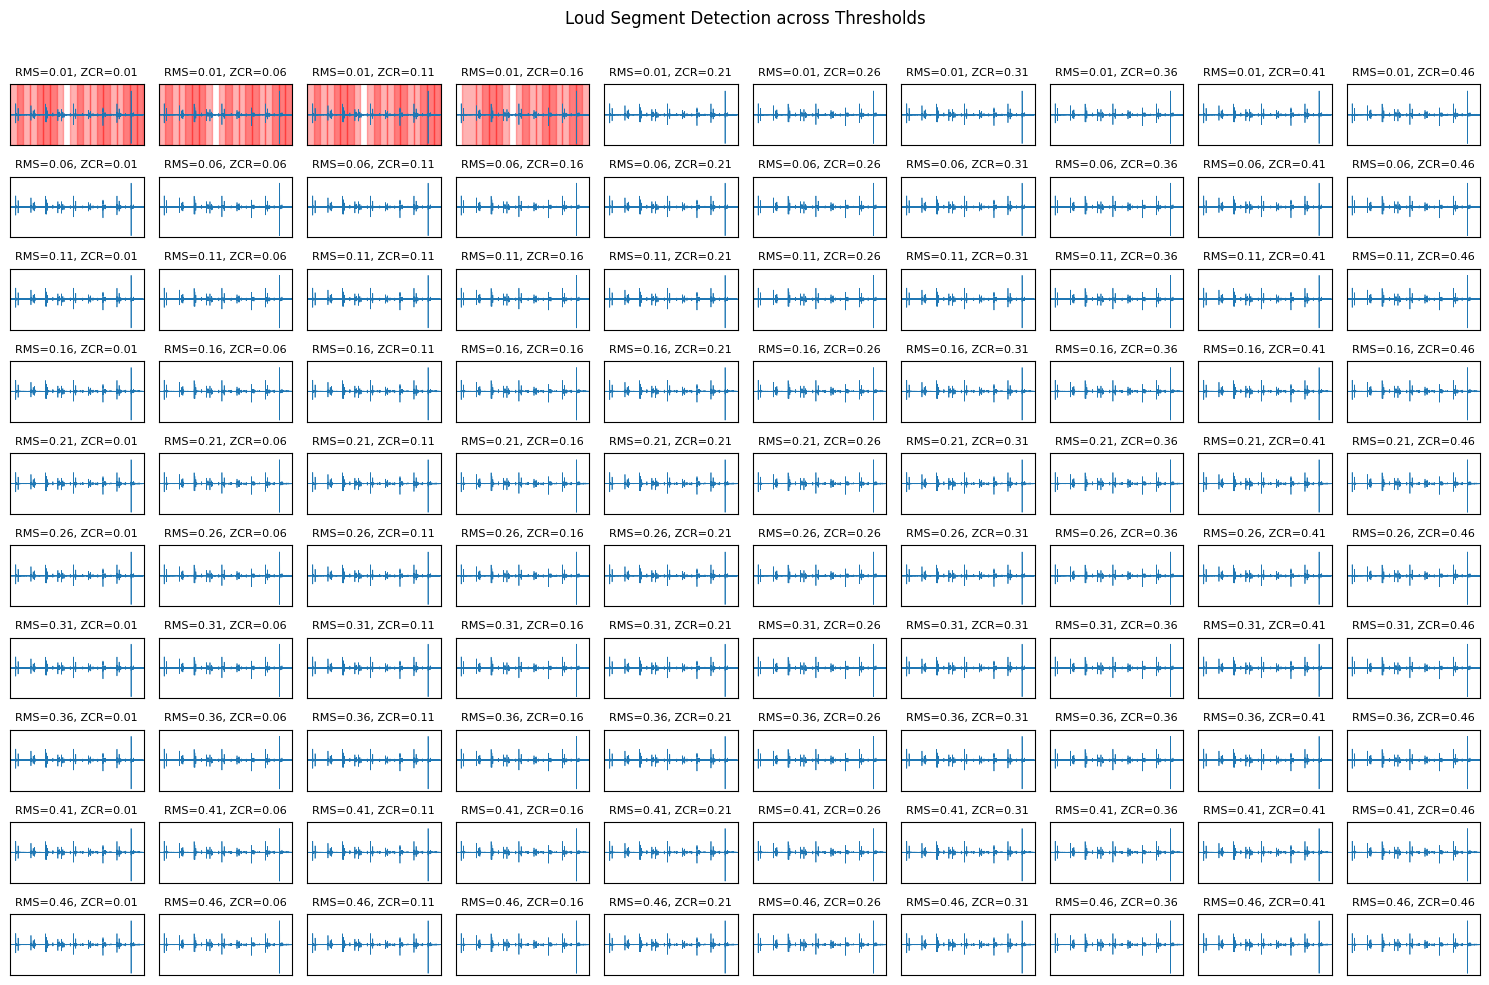

KeyboardInterrupt: 

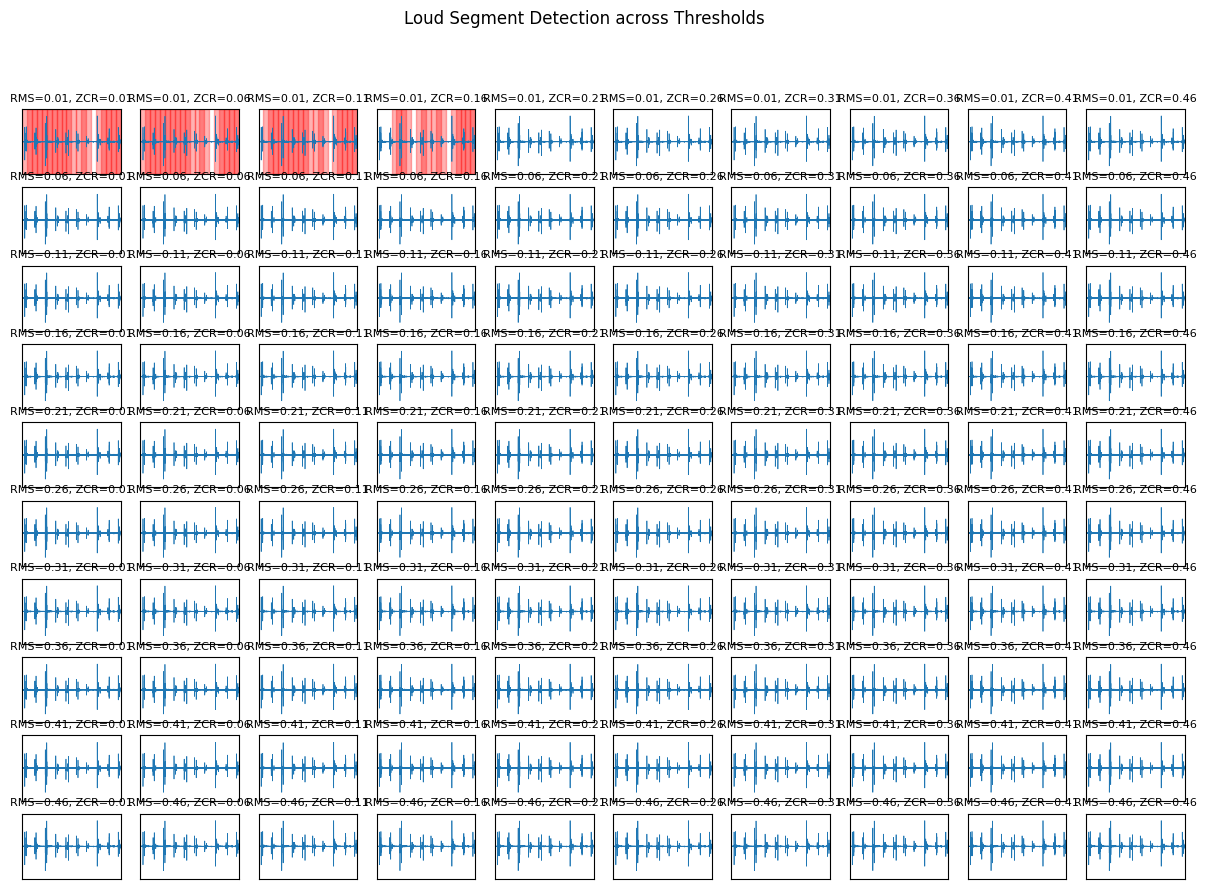

In [51]:
for audio_path in os.listdir(folder_path):
    audio_path = folder_path + "\\" + audio_path
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    rms_range = np.arange(0.01, 0.5, 0.05)
    zcr_range = np.arange(0.01, 0.5, 0.05)
    fig, axes = plt.subplots(len(rms_range), len(zcr_range), figsize=(15, 10))
    fig.suptitle("Loud Segment Detection across Thresholds", fontsize=12)
    for i, RMST in enumerate(rms_range):
        for j, ZCRT in enumerate(zcr_range):
            results = classify_loud_segments_vectorized(y, sr, FRAME_DURATION, HOP_LENGTH, RMST, ZCRT)
            ax = axes[i, j]
            title = f"RMS={RMST:.2f}, ZCR={ZCRT:.2f}"
            plot_waveform_with_segments_multi(ax, y, sr, results, title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [ ]:
RMST = 0.11
ZCRT = 0.06

for audio_file in os.listdir(folder_path):
    audio_path = os.path.join(folder_path, audio_file)
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    results = classify_loud_segments_vectorized(y, sr, FRAME_DURATION, HOP_LENGTH, RMST, ZCRT)
    title = f"{audio_file} — RMS={RMST:.2f}, ZCR={ZCRT:.2f}"
    plot_waveform_with_segments_single(y, sr, results, title)
    break